In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import yfinance as yf
%matplotlib inline

In [6]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


Scarico i dati

In [8]:
start=datetime.date(2014,5,31)
end=datetime.date(2024,3,31)

In [10]:
def get(tickers, start, end):
    def data(ticker):
        return yf.download(ticker,start,end)
    datas=map(data,tickers)
    return pd.concat(datas,keys=tickers,names=['Ticker','Date'])

In [12]:
tickers=['GOOGL','INTC','JNJ','PFE','XOM','CVX']
all_data=get(tickers,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [521]:
all_data

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
GOOGL  2014-06-02   28.487499   28.520500   27.834999   28.216999   28.216999   
       2014-06-03   28.045000   28.120001   27.626499   27.725500   27.725500   
       2014-06-04   27.576000   27.929001   27.427999   27.688000   27.688000   
       2014-06-05   27.855499   28.250000   27.752501   28.246500   28.246500   
       2014-06-06   28.408001   28.440001   27.979000   28.301500   28.301500   
...                       ...         ...         ...         ...         ...   
CVX    2024-03-22  155.080002  155.279999  154.160004  154.660004  153.113876   
       2024-03-25  155.479996  157.309998  155.270004  156.470001  154.905777   
       2024-03-26  156.520004  156.860001  154.649994  155.270004  153.717773   
       2024-03-27  154.869995  156.440002  154.850006  156.350006  154.786987   
       2024-03-28  157.149994  158.190002  156.369995  157.740005  156.163086   

                     Volume  
Ticker Date                  
GOOGL  2014-06-02  33210000  
       2014-06-03  40626000  
       2014-06-04  34582000  
       2014-06-05  35868000  
       2014-06-06  34804000  
...                     ...  
CVX    2024-03-22   5973700  
       2024-03-25   6058700  
       2024-03-26   6677900  
       2024-03-27   7416900  
       2024-03-28   8331600  

[14844 rows x 6 columns]

In [14]:
just_closing_prices=all_data[['Adj Close']].reset_index()
just_closing_prices[:5]

Ticker       Date  Adj Close
0  GOOGL 2014-06-02  28.184652
1  GOOGL 2014-06-03  27.693716
2  GOOGL 2014-06-04  27.656260
3  GOOGL 2014-06-05  28.214119
4  GOOGL 2014-06-06  28.269056

In [16]:
daily_close_px = just_closing_prices.pivot(index='Date', columns='Ticker', values='Adj Close')
daily_close_px[:5]

Ticker            CVX      GOOGL       INTC        JNJ        PFE        XOM
Date                                                                        
2014-06-02  80.842873  28.184652  20.856436  77.708122  19.524776  65.301125
2014-06-03  81.067780  27.693716  21.162472  77.928688  19.445906  65.595154
2014-06-04  80.935493  27.656260  21.116568  78.096024  19.478771  65.366455
2014-06-05  81.709442  28.214119  21.162472  78.506737  19.557632  65.699669
2014-06-06  82.152664  28.269056  21.552673  78.476311  19.334188  66.385780

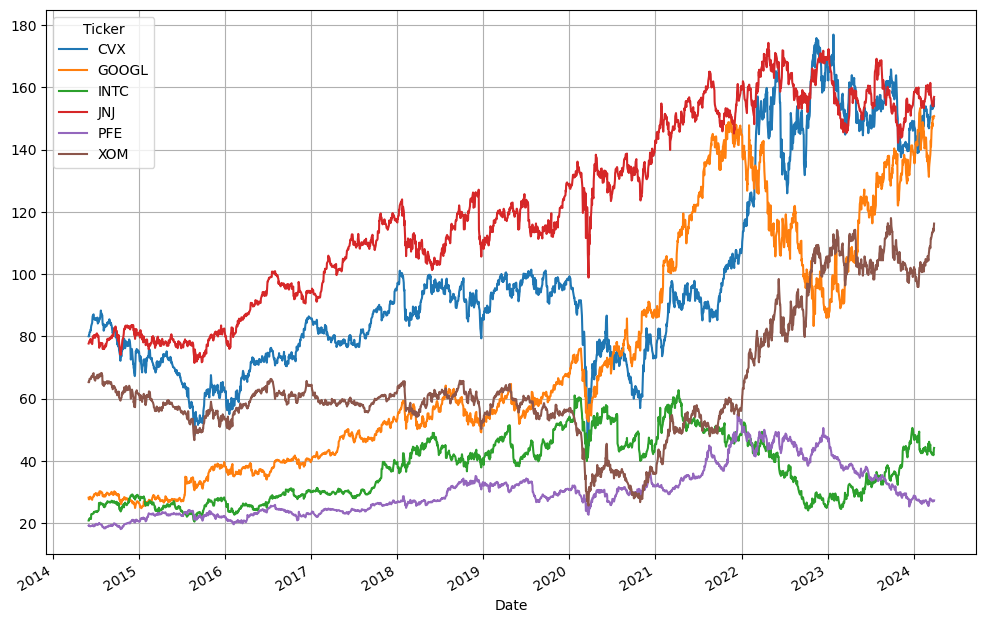

In [15]:
_=daily_close_px.plot(figsize=(12,8))
plt.grid()

In [603]:
#calvolo delle statistiche descrittive
all_data['Adj Close'].tail()

Ticker  Date      
CVX     2024-03-22    153.113876
        2024-03-25    154.905777
        2024-03-26    153.717773
        2024-03-27    154.786987
        2024-03-28    156.163086
Name: Adj Close, dtype: float64

In [18]:
all_data['RS_Lordo'] = all_data['Adj Close']/all_data['Adj Close'].shift(1).dropna()

In [20]:
all_data['RS_Netto'] = all_data['Adj Close'].pct_change(1).dropna()


In [22]:
all_data['RL'] = np.log(all_data['Adj Close']/all_data['Adj Close'].shift(1).dropna())

In [561]:
for ticker in tickers:
    df_ticker = all_data.loc[ticker]

    # Controlla i primi dati
    print(df_ticker.head(10))

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2014-06-02  28.487499  28.520500  27.834999  28.216999  28.216999  33210000   
2014-06-03  28.045000  28.120001  27.626499  27.725500  27.725500  40626000   
2014-06-04  27.576000  27.929001  27.427999  27.688000  27.688000  34582000   
2014-06-05  27.855499  28.250000  27.752501  28.246500  28.246500  35868000   
2014-06-06  28.408001  28.440001  27.979000  28.301500  28.301500  34804000   
2014-06-09  28.337500  28.600000  28.261000  28.536501  28.536501  30594000   
2014-06-10  28.438999  28.600000  28.306499  28.415001  28.415001  29676000   
2014-06-11  28.296000  28.448500  28.184000  28.375000  28.375000  22580000   
2014-06-12  28.350000  28.350000  27.857500  27.975000  27.975000  30930000   
2014-06-13  28.004000  28.032499  27.686001  28.017500  28.017500  27066000   

            RS_Lordo  RS_Netto        RL  
Date    

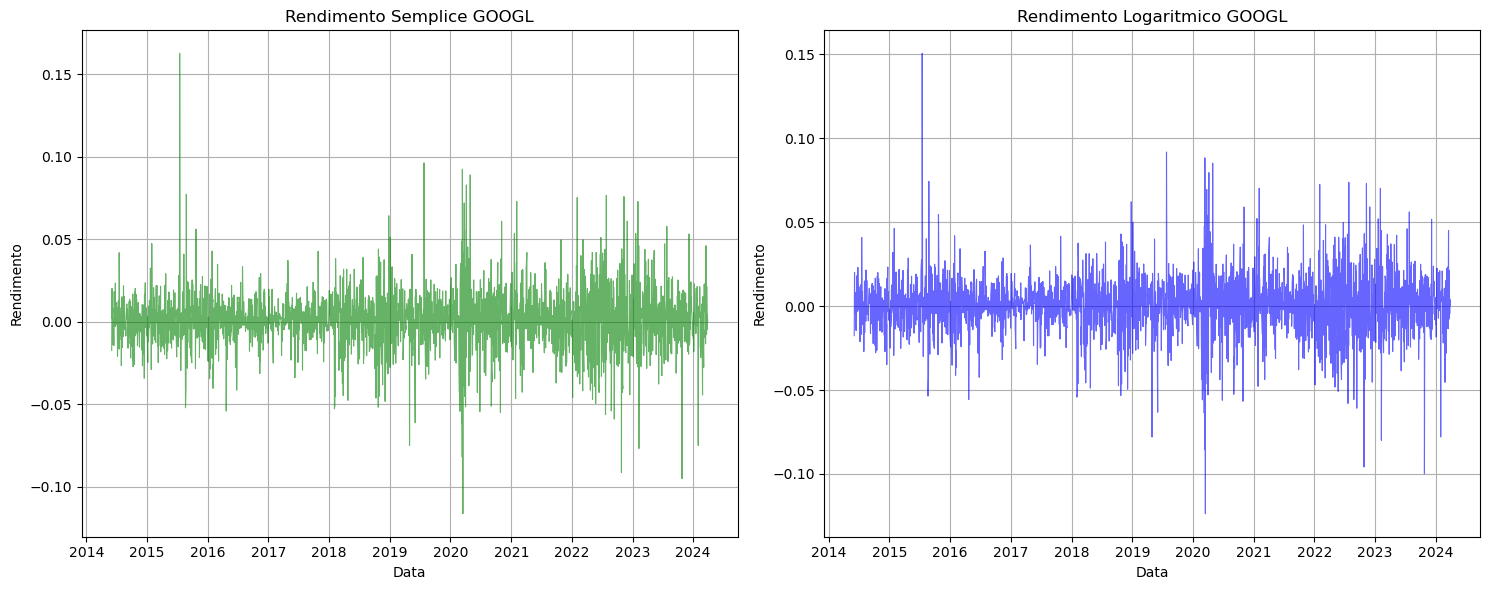

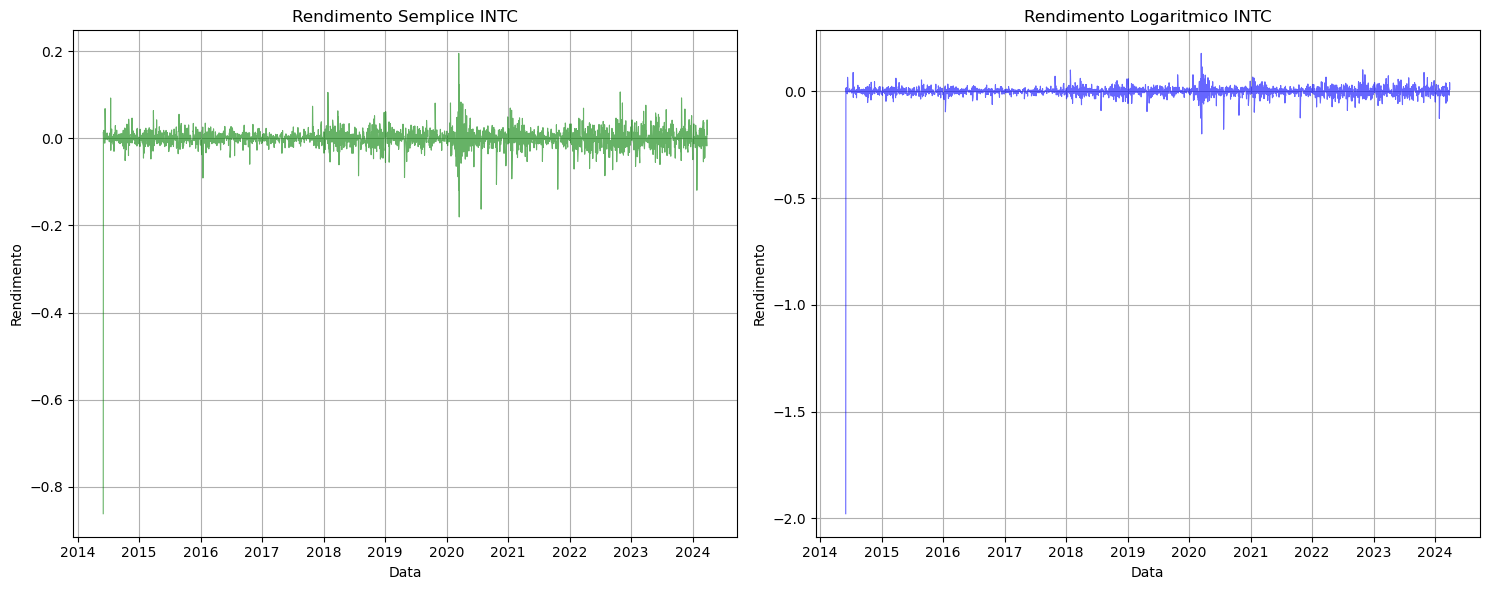

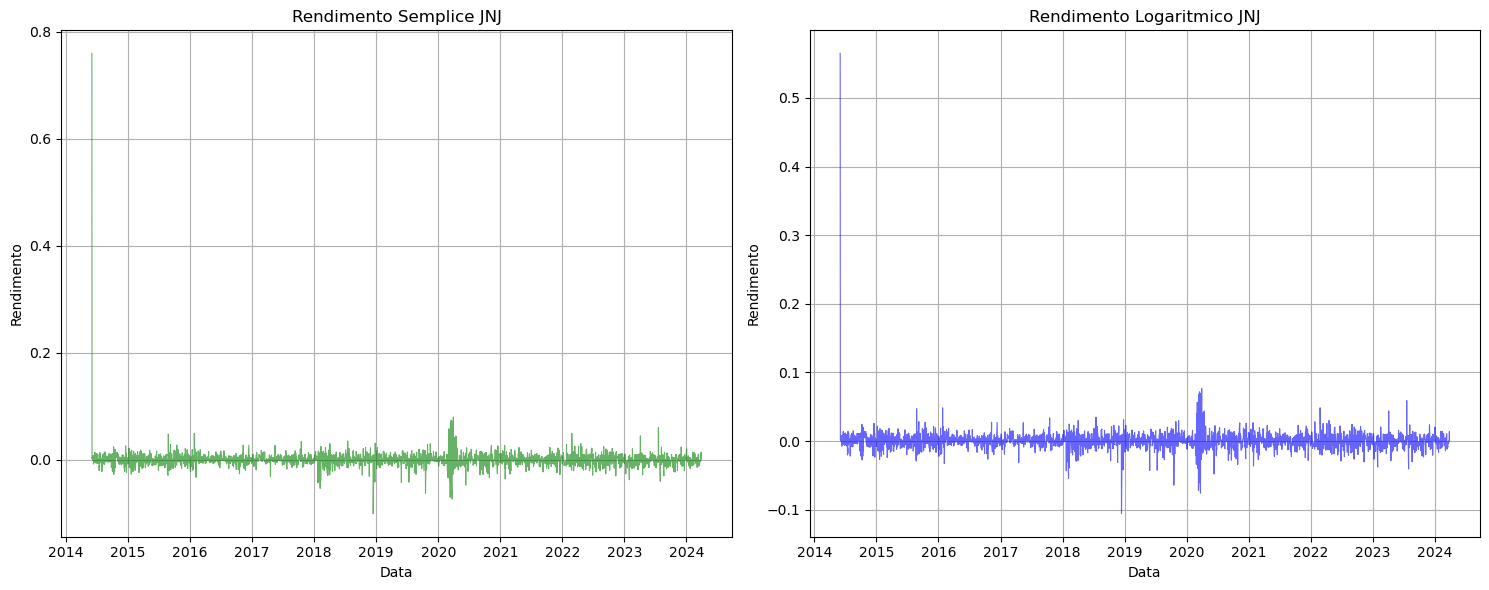

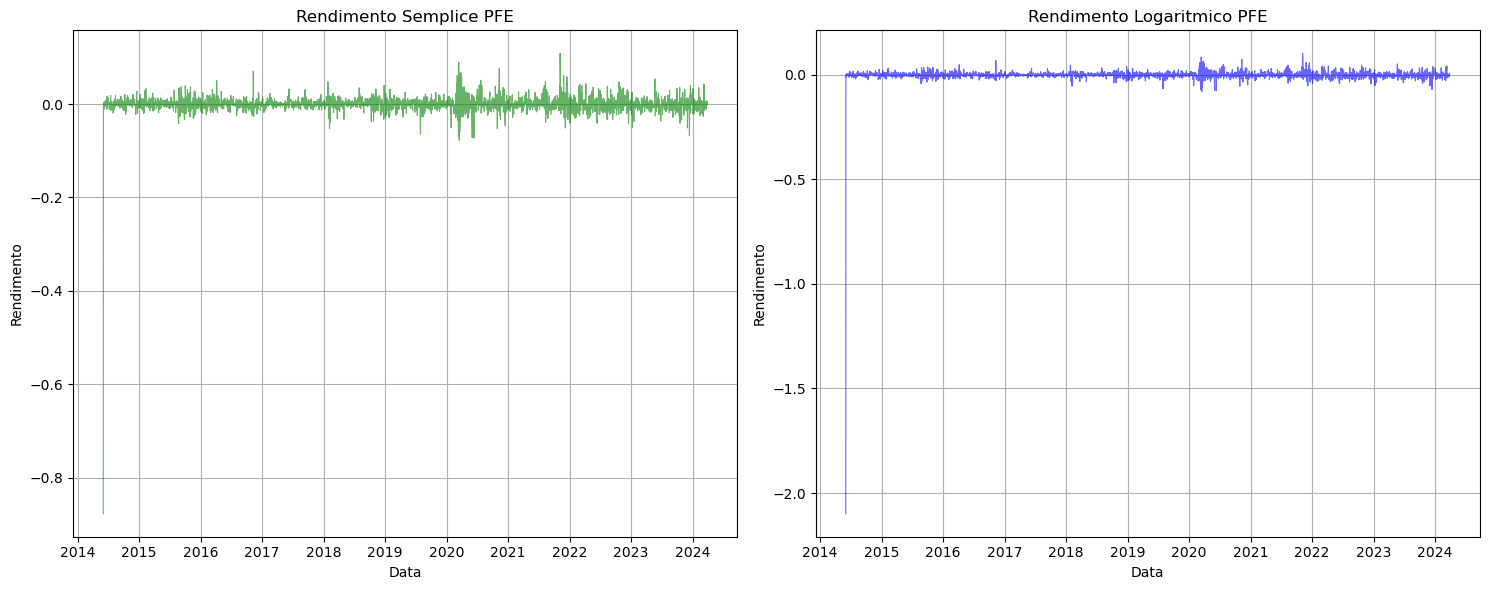

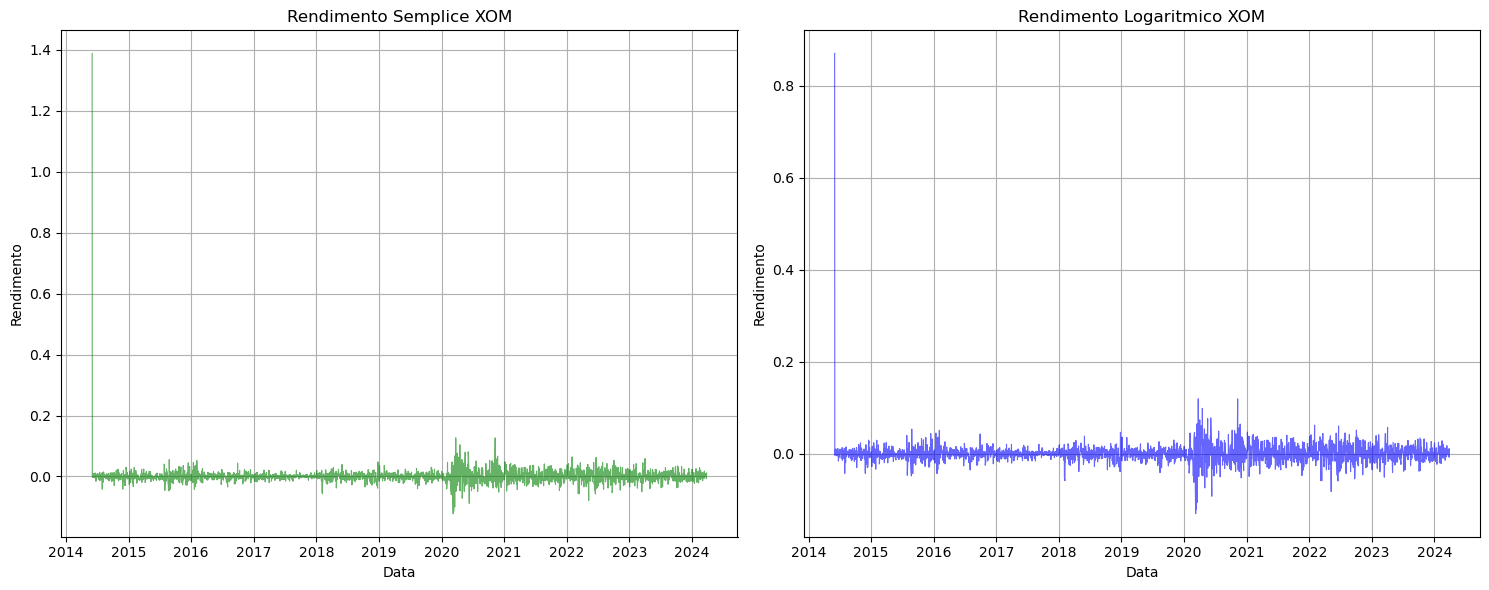

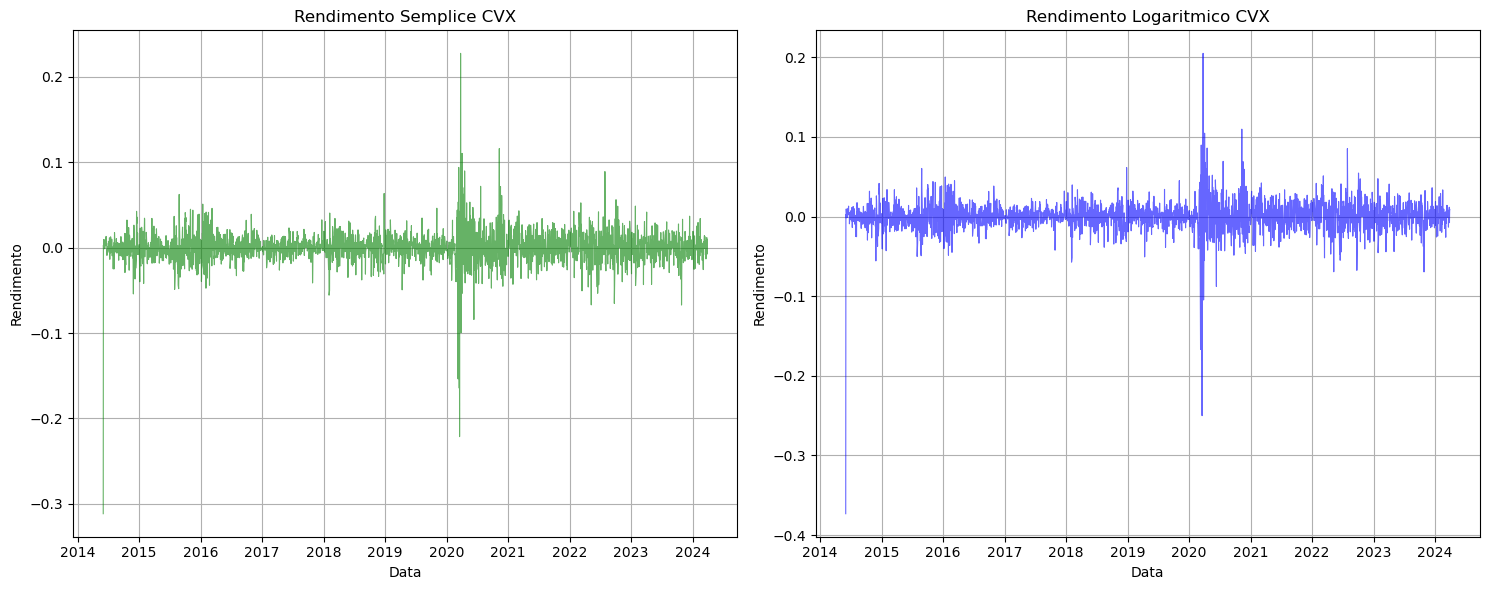

In [26]:
#rendimenti semplici e logaritmici
for ticker in tickers:
    df_ticker = all_data.loc[ticker]

   
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Plot dei rendimenti semplici
    ax1.plot(df_ticker.index, df_ticker['RS_Netto'], label='Rendimento Semplice', color='green', lw=0.8, alpha=0.6)
    ax1.set_title(f'Rendimento Semplice {ticker}')
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Rendimento')
    ax1.grid(True)

    # Plot dei rendimenti logaritmici
    ax2.plot(df_ticker.index, df_ticker['RL'], label='Rendimento Logaritmico', color='blue', lw=0.8, alpha=0.6)
    ax2.set_title(f'Rendimento Logaritmico {ticker}')
    ax2.set_xlabel('Data')
    ax2.set_ylabel('Rendimento')
    ax2.grid(True)


    plt.tight_layout()
    plt.savefig(f"/Users/computer/Desktop/{ticker}_gra.png")
    plt.show()

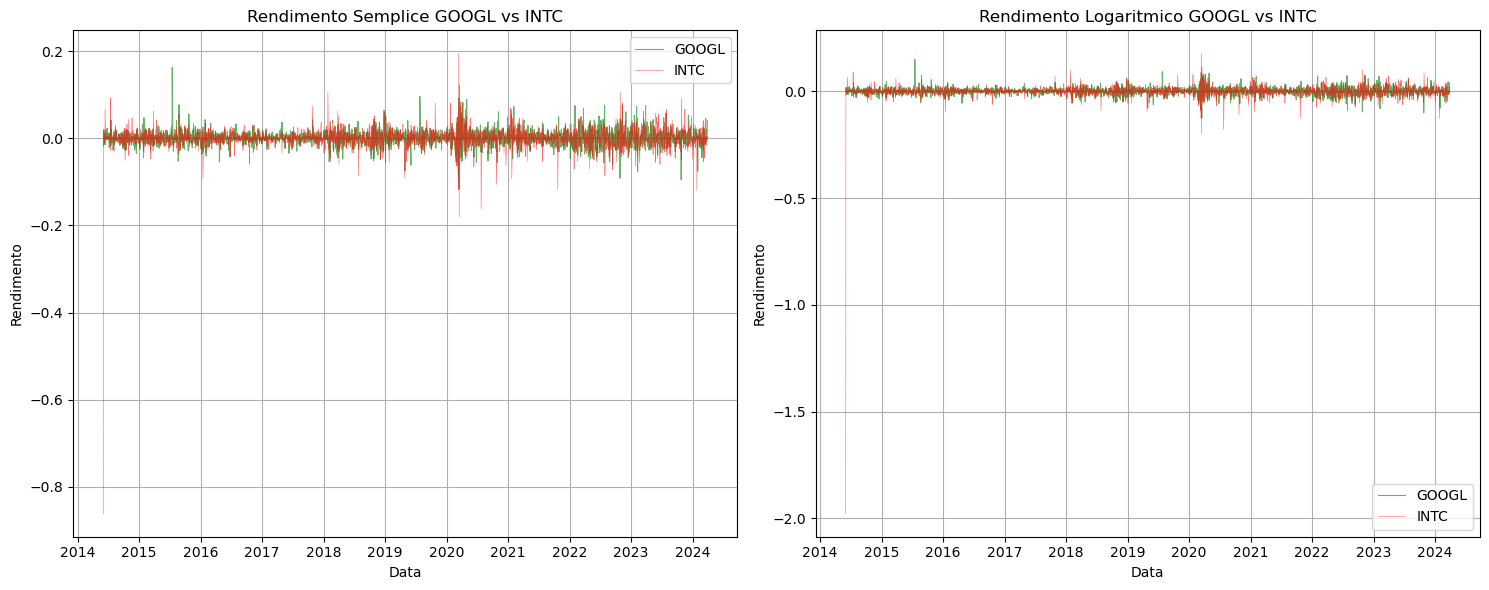

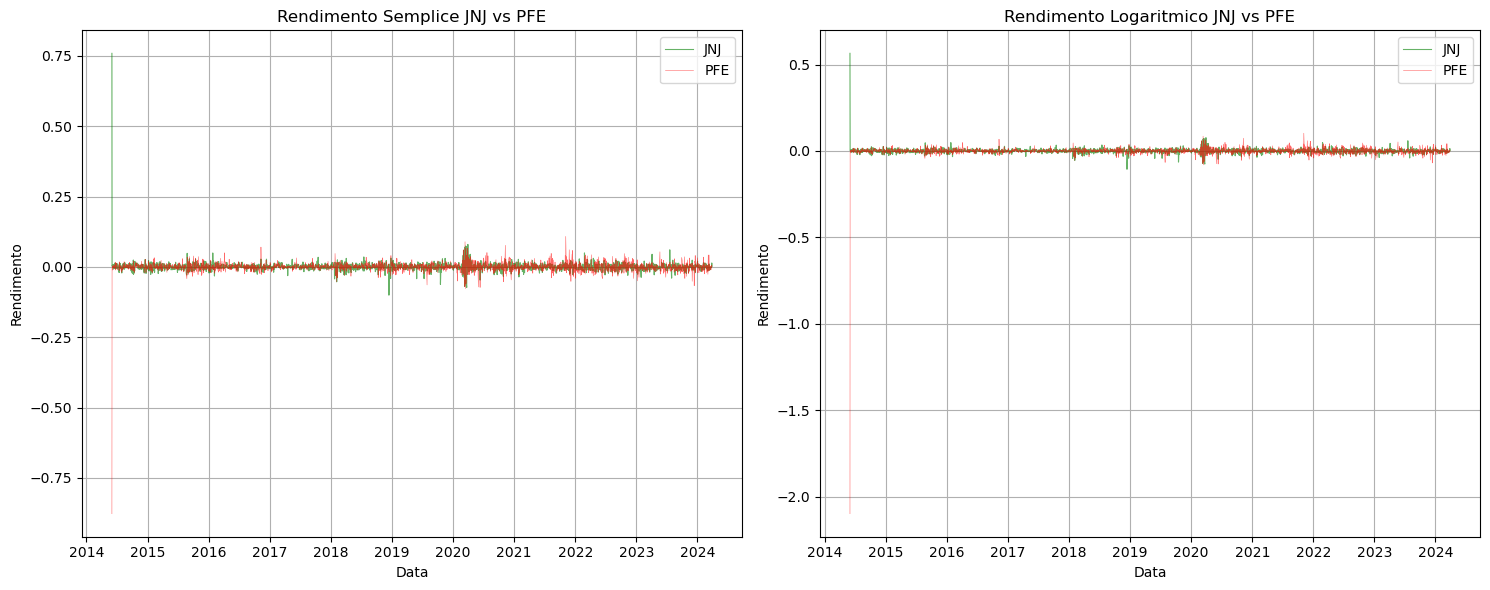

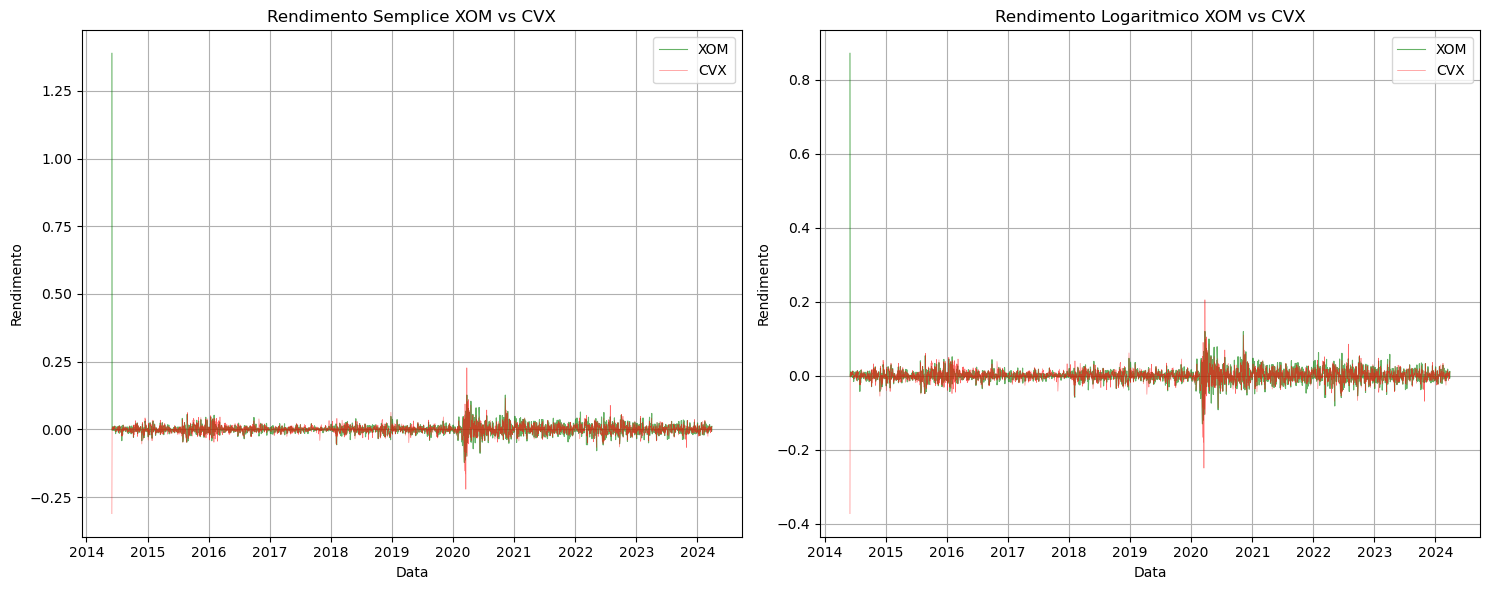

In [32]:
#rendimenti semplici e logaritmici
settori = [
    ('GOOGL', 'INTC'),
    ('JNJ', 'PFE'),
    ('XOM', 'CVX')
]

for settore in settori:
    ticker1, ticker2 = settore
    
    df_ticker1 = all_data.loc[ticker1]
    df_ticker2 = all_data.loc[ticker2]

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Plot dei rendimenti semplici
    ax1.plot(df_ticker1.index, df_ticker1['RS_Netto'], label=ticker1, color='green', lw=0.8, alpha=0.6)
    ax1.plot(df_ticker2.index, df_ticker2['RS_Netto'], label=ticker2, color='red', lw=0.4, alpha=0.6)
    ax1.set_title(f'Rendimento Semplice {ticker1} vs {ticker2}')
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Rendimento')
    ax1.grid(True)
    ax1.legend()

    # Plot dei rendimenti logaritmici
    ax2.plot(df_ticker1.index, df_ticker1['RL'], label=ticker1, color='green', lw=0.8, alpha=0.6)
    ax2.plot(df_ticker2.index, df_ticker2['RL'], label=ticker2, color='red', lw=0.4, alpha=0.6)
    ax2.set_title(f'Rendimento Logaritmico {ticker1} vs {ticker2}')
    ax2.set_xlabel('Data')
    ax2.set_ylabel('Rendimento')
    ax2.grid(True)
    ax2.legend()
    plt.tight_layout()

    plt.savefig(f"/Users/computer/Desktop/{ticker1}_vs_{ticker2}_gra.png")

    plt.show()

In [24]:
# Calcola i rendimenti giornalieri
all_data['Daily_Return'] = all_data.groupby('Ticker')['Adj Close'].pct_change() 


In [26]:
# Calcola il rendimento cumulativo per ciascun titolo
all_data['Cumulative_Return'] = (1 + all_data['Daily_Return']).groupby('Ticker').cumprod() - 1



In [197]:
all_data['Daily_Return']

Ticker  Date      
GOOGL   2014-06-02         NaN
        2014-06-03   -0.017419
        2014-06-04   -0.001353
        2014-06-05    0.020171
        2014-06-06    0.001947
                        ...   
CVX     2024-03-22   -0.001291
        2024-03-25    0.011703
        2024-03-26   -0.007669
        2024-03-27    0.006956
        2024-03-28    0.008890
Name: Daily_Return, Length: 14844, dtype: float64

In [262]:
all_data['Cumulative_Return']

Ticker  Date      
GOOGL   2014-06-02         NaN
        2014-06-03   -0.017419
        2014-06-04   -0.018748
        2014-06-05    0.001046
        2014-06-06    0.002995
                        ...   
CVX     2024-03-22    0.913094
        2024-03-25    0.935483
        2024-03-26    0.920639
        2024-03-27    0.933999
        2024-03-28    0.951193
Name: Cumulative_Return, Length: 14844, dtype: float64

Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
GOOGL  2014-06-02  28.487499  28.520500  27.834999  28.216999  28.216999   
       2014-06-03  28.045000  28.120001  27.626499  27.725500  27.725500   
       2014-06-04  27.576000  27.929001  27.427999  27.688000  27.688000   
       2014-06-05  27.855499  28.250000  27.752501  28.246500  28.246500   
       2014-06-06  28.408001  28.440001  27.979000  28.301500  28.301500   

                     Volume  RS_Lordo  RS_Netto        RL  Daily_Return  \
Ticker Date                                                               
GOOGL  2014-06-02  33210000       NaN       NaN       NaN           NaN   
       2014-06-03  40626000  0.982581 -0.017419 -0.017572     -0.017419   
       2014-06-04  34582000  0.998647 -0.001353 -0.001353     -0.001353   
       2014-06-05  35868000  1.020171  0.020171  0.019970      0.020171   
       2014-06-06  34804000  1.001947  0.001947  0.001945      0.001947   

                   Cumulative_Return  
Ticker Date                           
GOOGL  2014-06-02                NaN  
       2014-06-03          -0.017419  
       2014-06-04          -0.018748  
       2014-06-05           0.001046  
       2014-06-06           0.002995

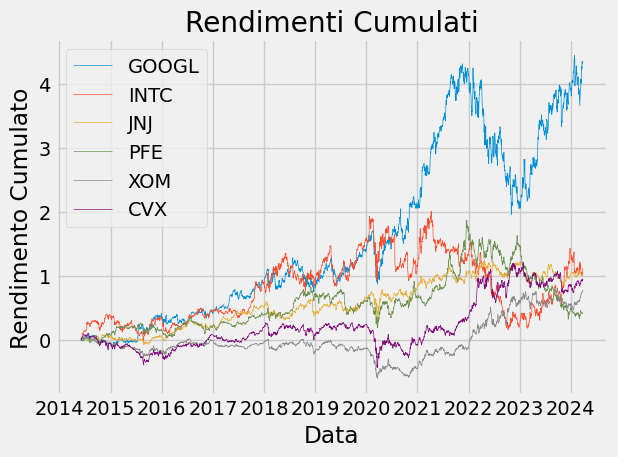

In [625]:
for ticker in tickers:
    df_ticker = all_data.loc[ticker]
    plt.plot(df_ticker.index, df_ticker['Cumulative_Return'], lw=0.5, label=ticker)

plt.title('Rendimenti Cumulati')
plt.xlabel('Data')
plt.ylabel('Rendimento Cumulato')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/Users/computer/Desktop/graf.png")

all_data.head()

In [54]:
# Calcola il numero di anni nel periodo
n_years = (pd.to_datetime(end) - pd.to_datetime(start)).days / 365.25
#n_years periodo considerato
# Calcola il CAGR per ciascun titolo
def calculate_cagr(df):
    initial_value = df['Adj Close'].iloc[0]
    final_value = df['Adj Close'].iloc[-1]
    return (final_value / initial_value) ** (1 / n_years) - 1

cagr = all_data.groupby('Ticker').apply(calculate_cagr)
cagr.name = 'CAGR'

# Mostra il rendimento cumulativo e il CAGR per ciascun titolo
print(all_data[['Adj Close', 'Cumulative_Return']].head())
print(cagr)

                   Adj Close  Cumulative_Return
Ticker Date                                    
GOOGL  2014-06-02  28.184652                NaN
       2014-06-03  27.693716          -0.017419
       2014-06-04  27.656260          -0.018748
       2014-06-05  28.214119           0.001045
       2014-06-06  28.269056           0.002995
Ticker
CVX      0.070333
GOOGL    0.185914
INTC     0.079289
JNJ      0.074078
PFE      0.036394
XOM      0.060389
Name: CAGR, dtype: float64


In [56]:
n_years #periodo considerato

9.834360027378509

In [58]:
# Raggruppo per frequenza mensile
all_data_m = all_data.groupby([pd.Grouper(level='Ticker'), pd.Grouper(level='Date', freq='M')]).last()
all_data_m.head()

Open        High         Low       Close  Adj Close  \
Ticker Date                                                                    
CVX    2014-06-30  130.149994  130.630005  129.369995  130.550003  85.496506   
       2014-07-31  131.729996  131.970001  129.100006  129.240005  84.638618   
       2014-08-31  129.000000  129.529999  128.500000  129.449997  85.496704   
       2014-09-30  120.510002  120.510002  118.660004  119.320000  78.806198   
       2014-10-31  118.349998  120.169998  116.389999  119.949997  79.222298   

                     Volume  RS_Lordo  RS_Netto        RL  Daily_Return  \
Ticker Date                                                               
CVX    2014-06-30   5698900  1.001458  0.001458  0.001457      0.001458   
       2014-07-31   7973700  0.975176 -0.024824 -0.025138     -0.024824   
       2014-08-31   3519000  1.005437  0.005437  0.005423      0.005437   
       2014-09-30   8385700  0.989797 -0.010203 -0.010256     -0.010203   
       2014-10-31  10669500  1.023464  0.023464  0.023193      0.023464   

                   Cumulative_Return  
Ticker Date                           
CVX    2014-06-30           0.068243  
       2014-07-31           0.057524  
       2014-08-31           0.068245  
       2014-09-30          -0.015350  
       2014-10-31          -0.010151

In [28]:
all_data_m['RS_Lordo']=all_data_m['Adj Close']/all_data_m['Adj Close'].shift(1)
all_data_m['RS_Netto'] = all_data_m['Adj Close'].pct_change(1)
all_data_m['RL']= np.log(all_data_m['Adj Close']/all_data_m['Adj Close'].shift(1))
all_data_m.head()

NameError: name 'all_data_m' is not defined

In [62]:
all_data_m['Adj Close'][-1]/all_data_m['Adj Close'][0] #rendimenti nel periodo

/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/889431543.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_data_m['Adj Close'][-1]/all_data_m['Adj Close'][0] #rendimenti nel periodo


1.359587703162125

In [64]:
RS_Netto_m = np.mean(all_data_m['RS_Netto'])
(1+RS_Netto_m)**(n_years*12) 
#è un numero molto più elevato di quello corretto poichè i rendimenti semplici non si sommano

2.6575621335145794

In [50]:
RL_m = np.mean(all_data_m['RL'])
np.exp(RL_m*n_years*12) 
#numero circa corretto poichè i rendimenti logaritmici si possono sommare

1.0511916145565652

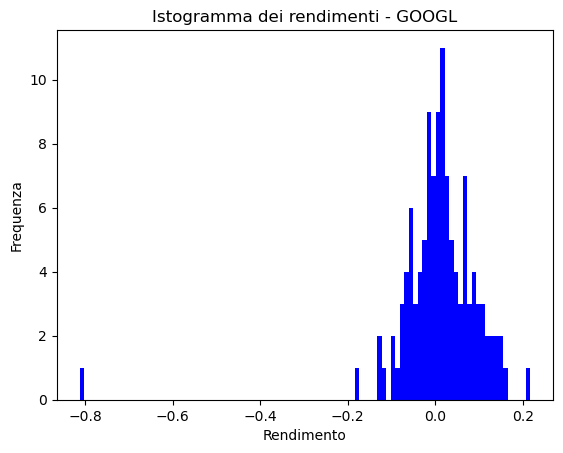

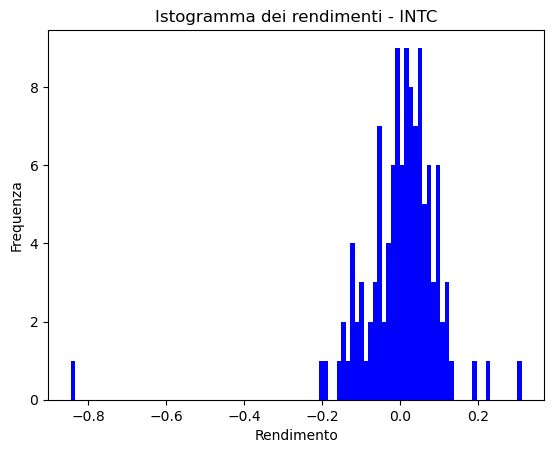

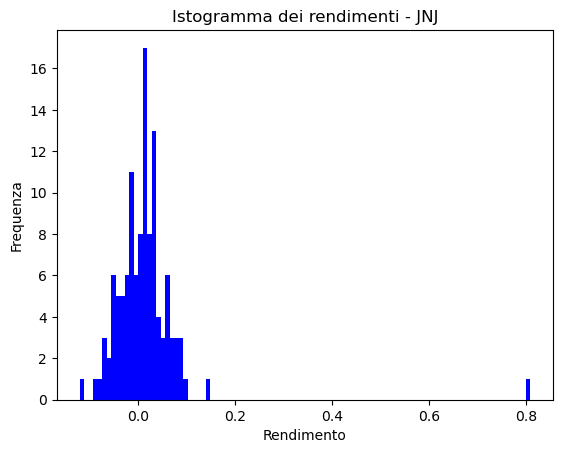

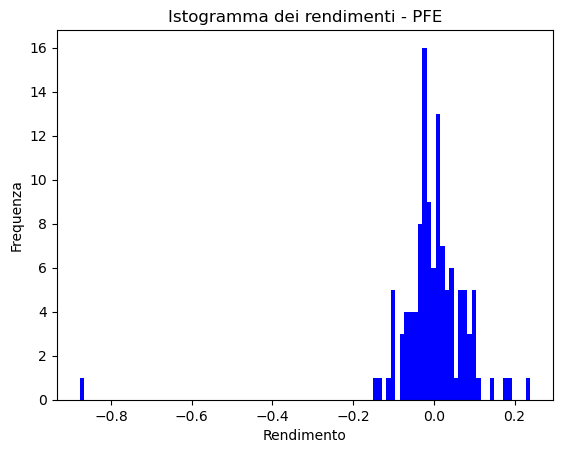

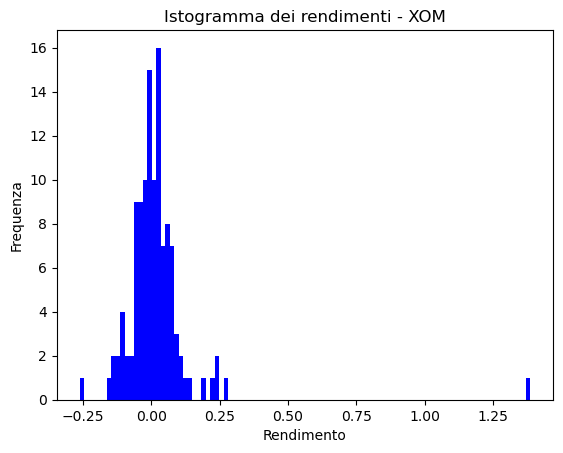

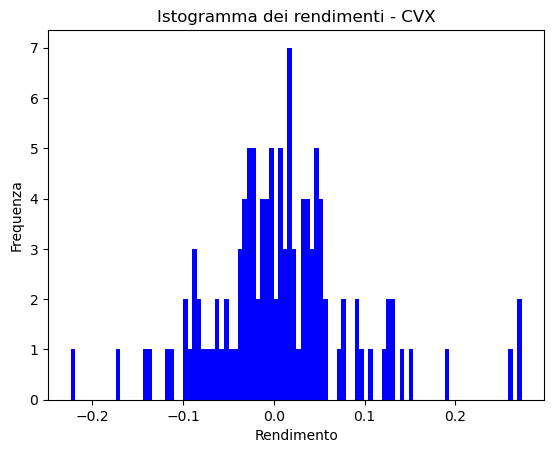

In [54]:
for ticker in tickers:
    plt.hist(all_data_m.loc[ticker]['RS_Netto'], bins=100, color='blue')
    plt.xlabel('Rendimento')
    plt.ylabel('Frequenza')
    plt.title(f'Istogramma dei rendimenti - {ticker}')
    plt.show()

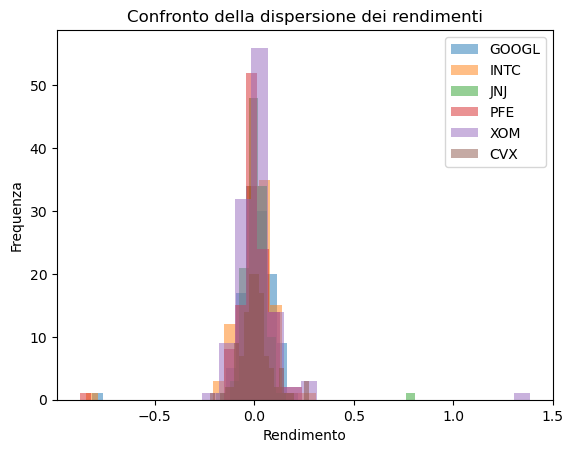

In [132]:
for ticker in tickers:
    plt.hist(all_data_m.loc[ticker]['RS_Netto'], bins=2#0, alpha=0.5, label=ticker)  # Imposta alpha per vedere meglio sovrapposti
    plt.xlabel('Rendimento')
    plt.ylabel('Frequenza')
    plt.title('Confronto della dispersione dei rendimenti')
    plt.legend()

plt.show()

In [ ]:
#troviamo la dispersione più ampia per il titolo XOM, una meno ampia ma sempre positiva per il JNJ,
#e un agglomerato neglativo di titoliPFE,INTC,OOGL e CVX

e

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


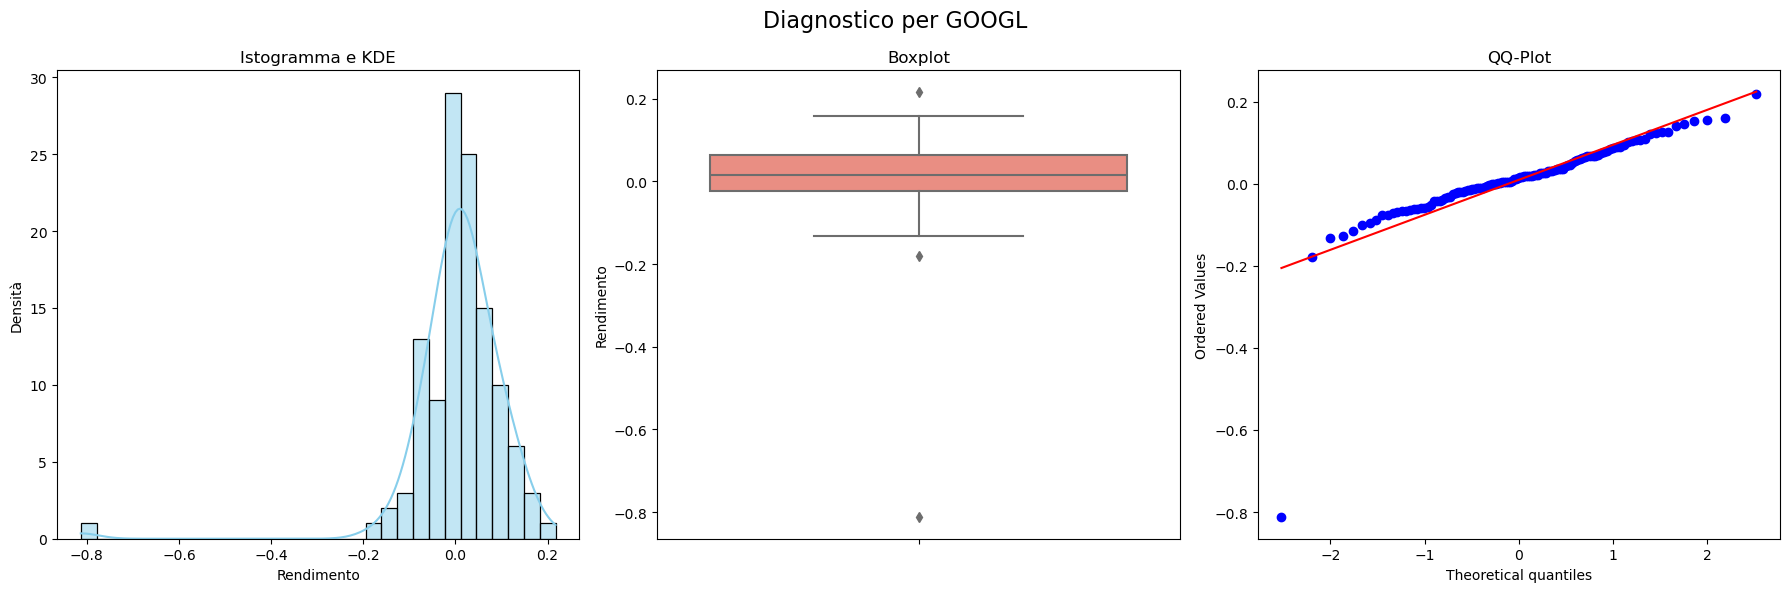

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


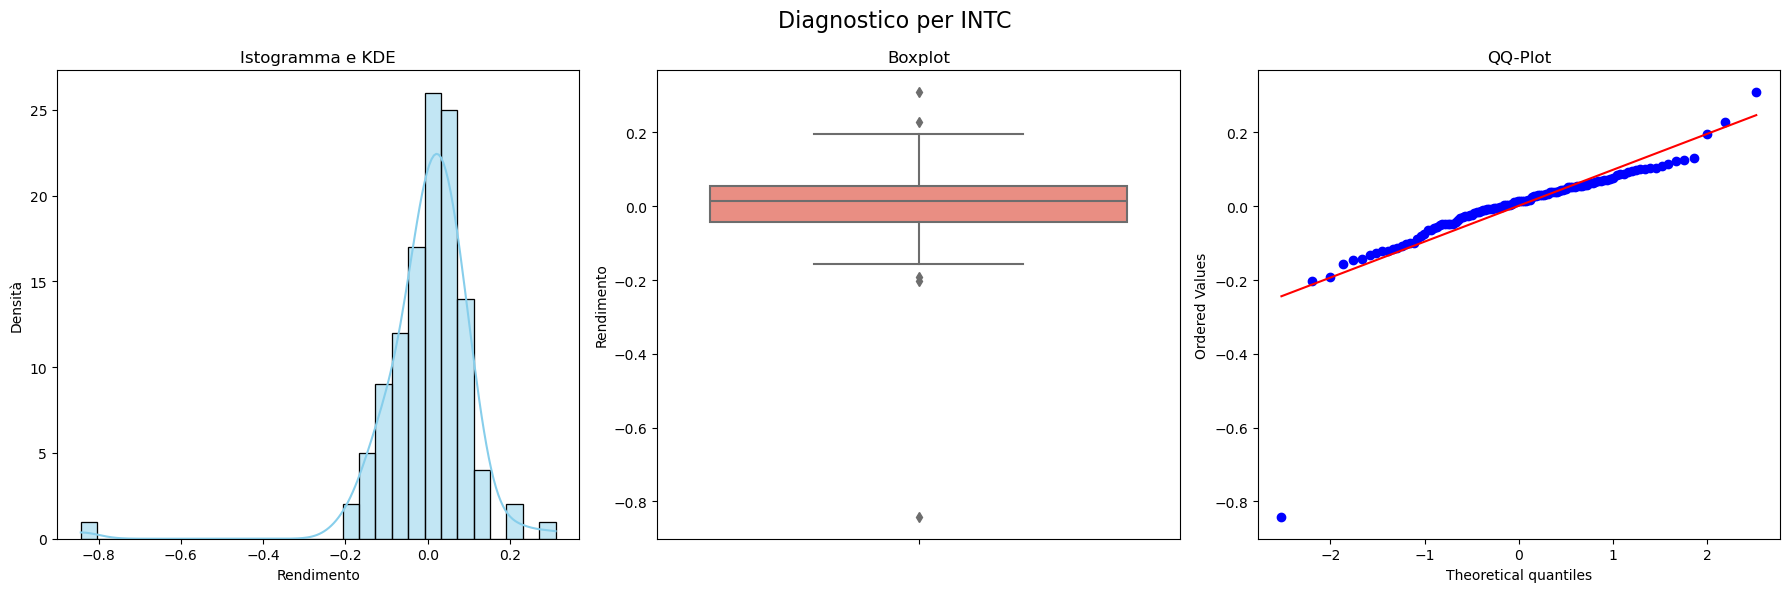

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


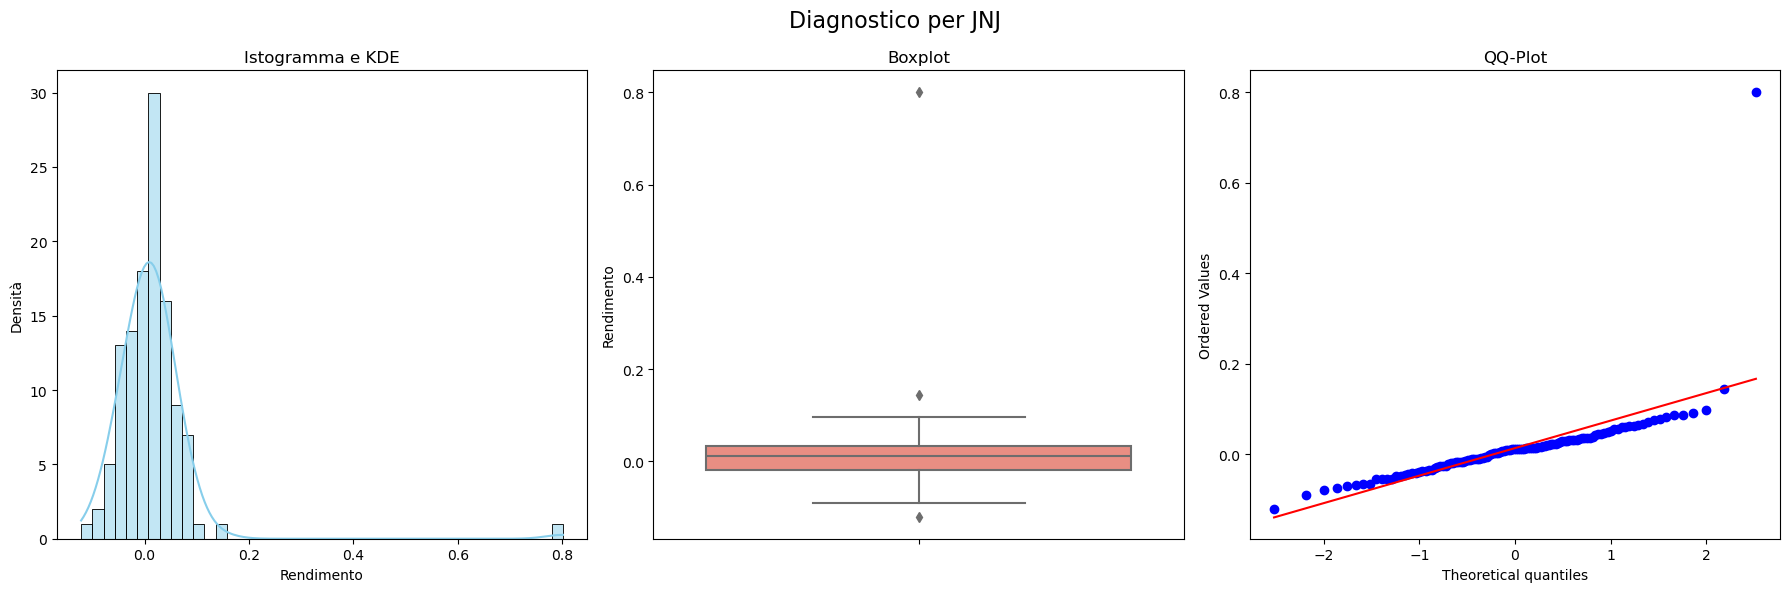

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


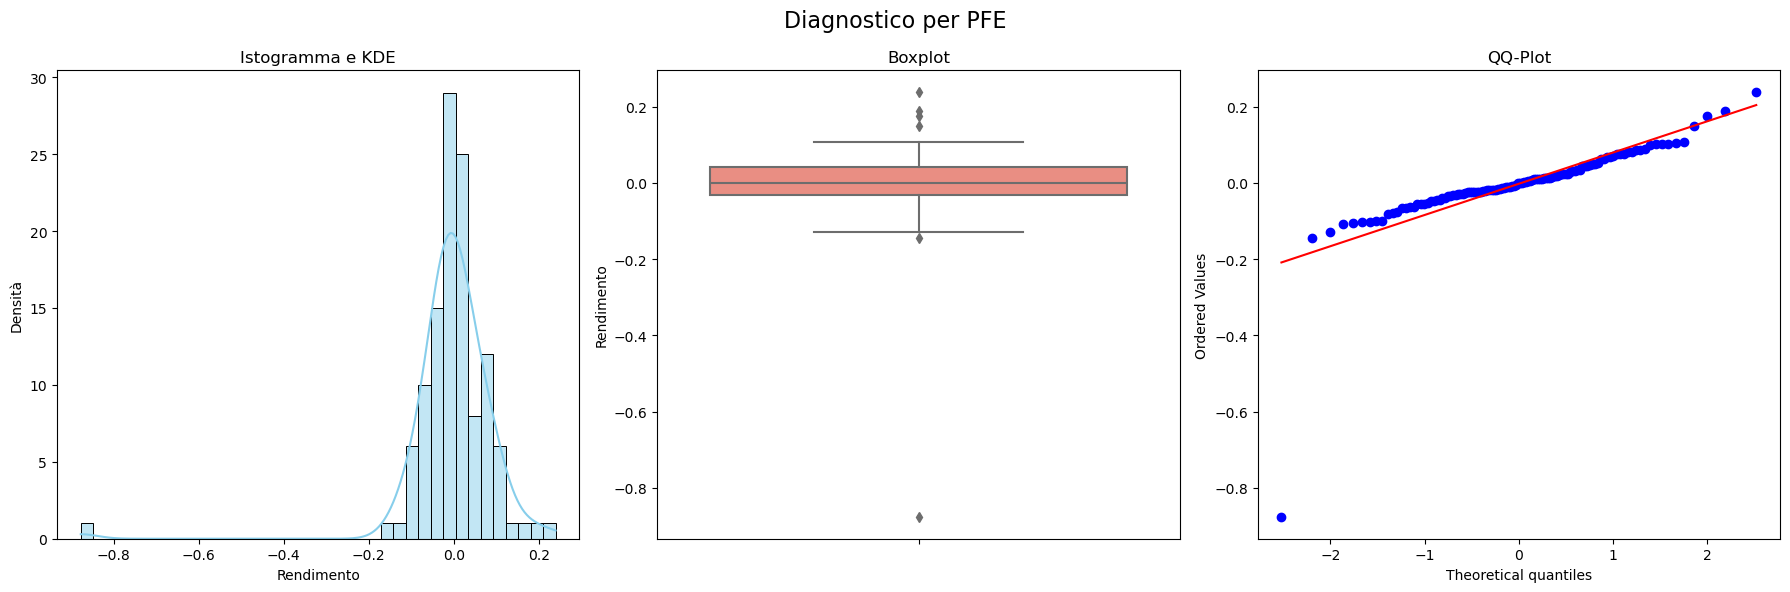

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


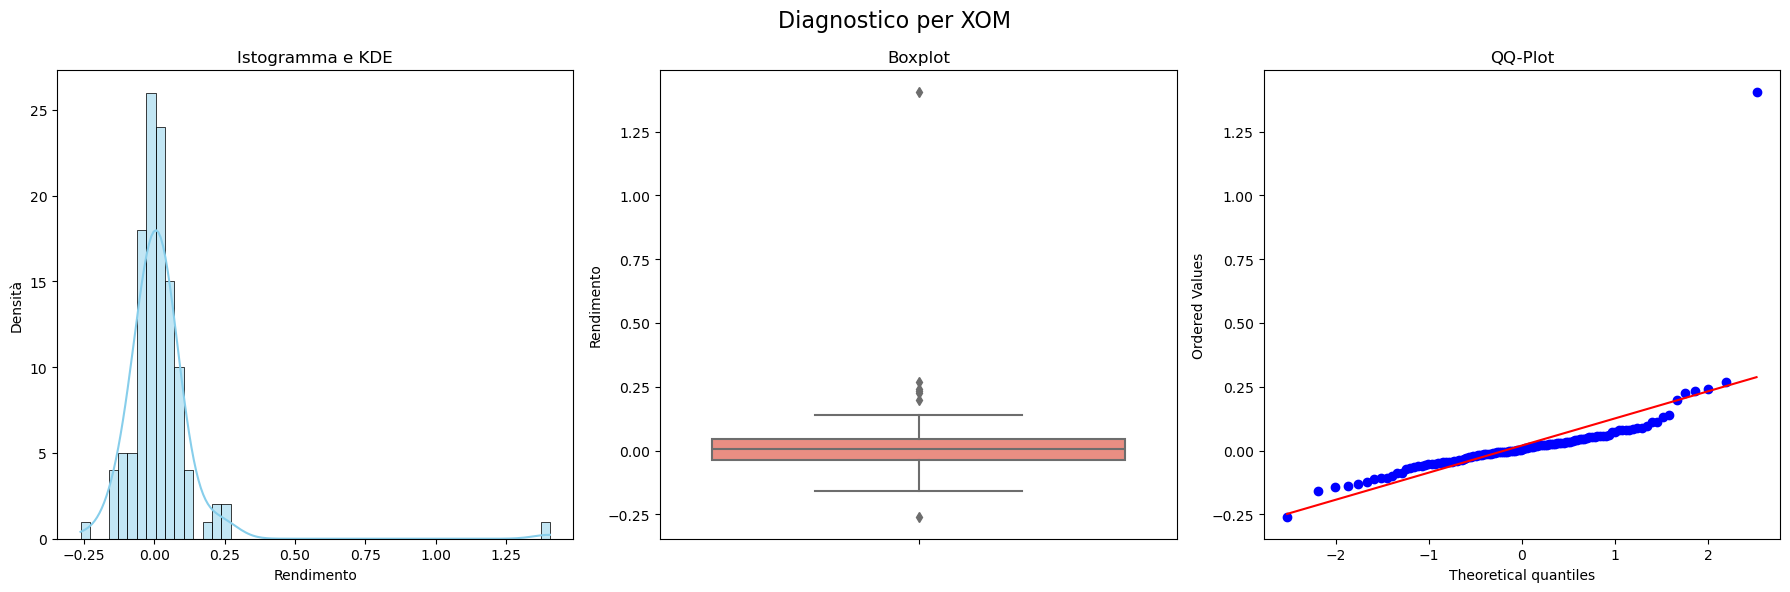

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


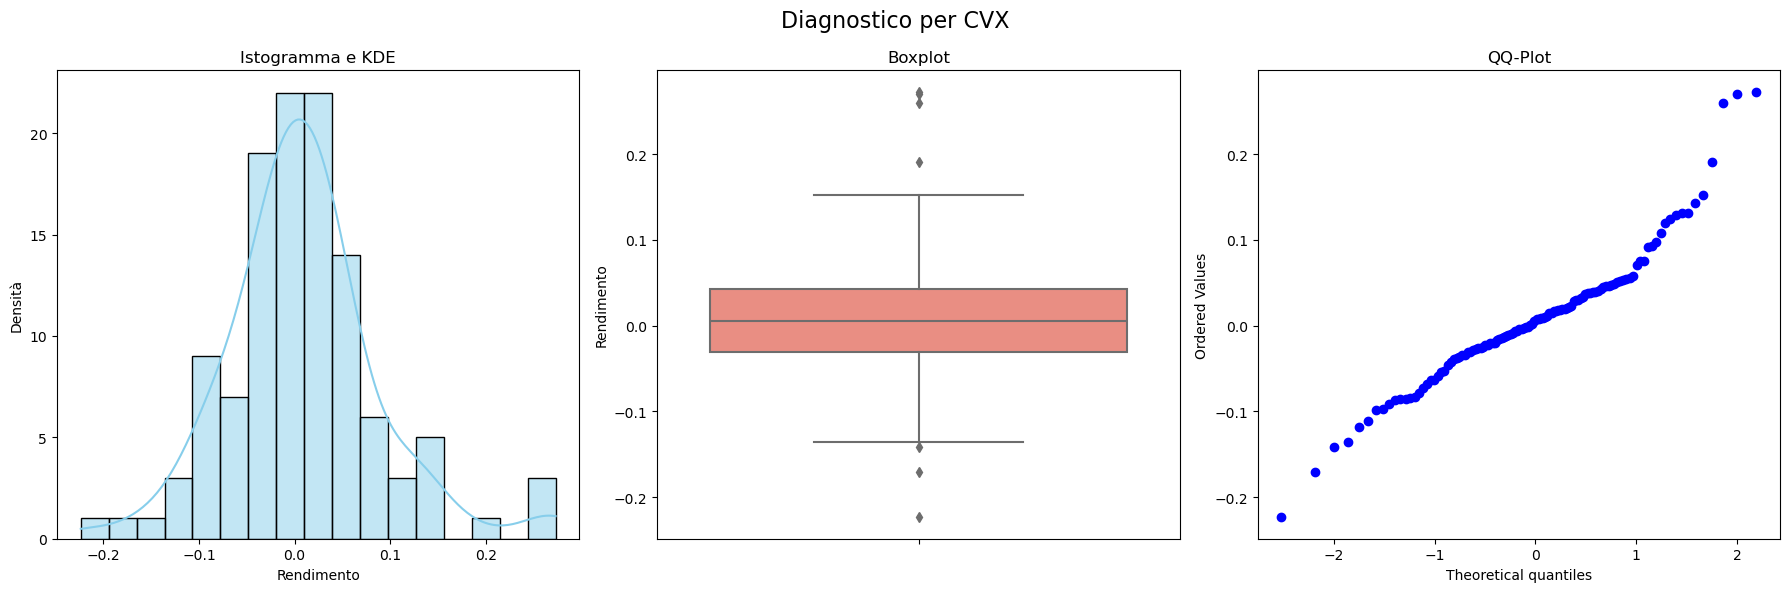

In [72]:
import scipy.stats as stats
import seaborn as sns

for ticker in tickers:
   
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

    sns.histplot(all_data_m.loc[ticker]['RS_Netto'], kde=True, ax=ax[0], color='skyblue')
    ax[0].set_title('Istogramma e KDE')
    ax[0].set_xlabel('Rendimento')
    ax[0].set_ylabel('Densità')

    sns.boxplot(y=all_data_m.loc[ticker]['RS_Netto'], ax=ax[1], color='salmon')
    ax[1].set_title('Boxplot')
    ax[1].set_ylabel('Rendimento')

    stats.probplot(all_data_m.loc[ticker]['RS_Netto'], dist="norm", plot=ax[2])
    ax[2].set_title('QQ-Plot')

    plt.suptitle(f'Diagnostico per {ticker}', fontsize=16)
    
    plt.tight_layout()
    plt.savefig(f"/Users/computer/Desktop/{ticker}_graf.png")
    plt.show()
    

f

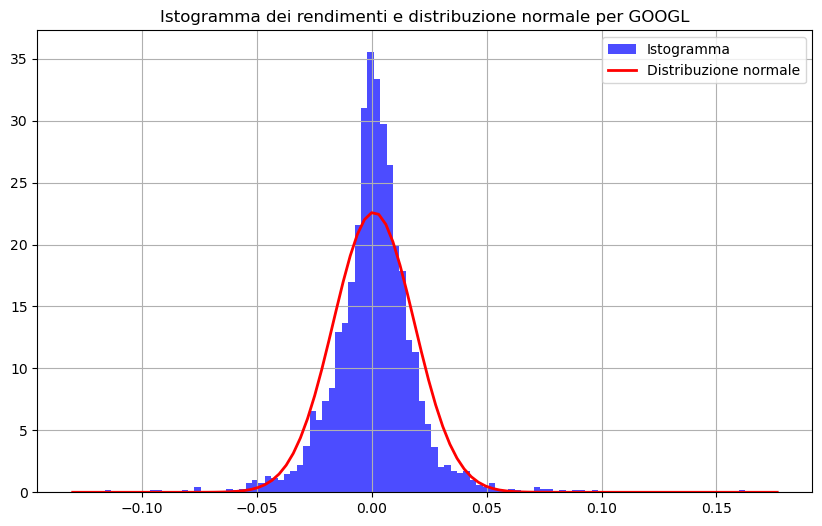

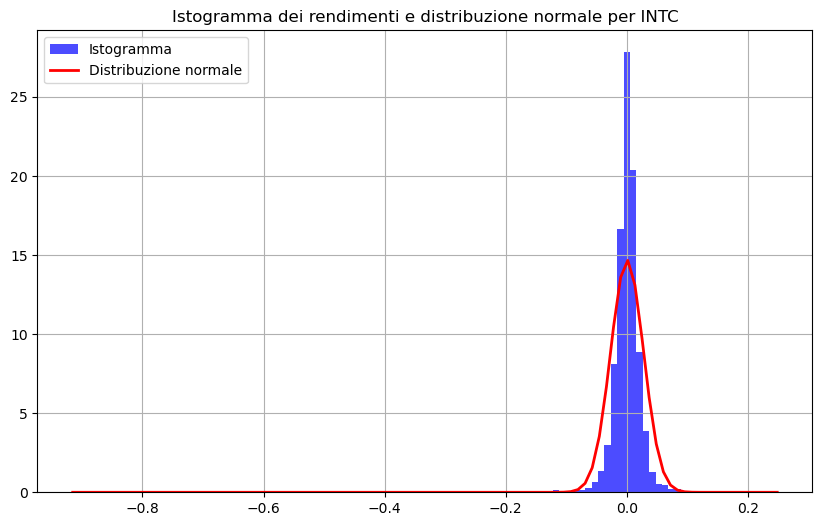

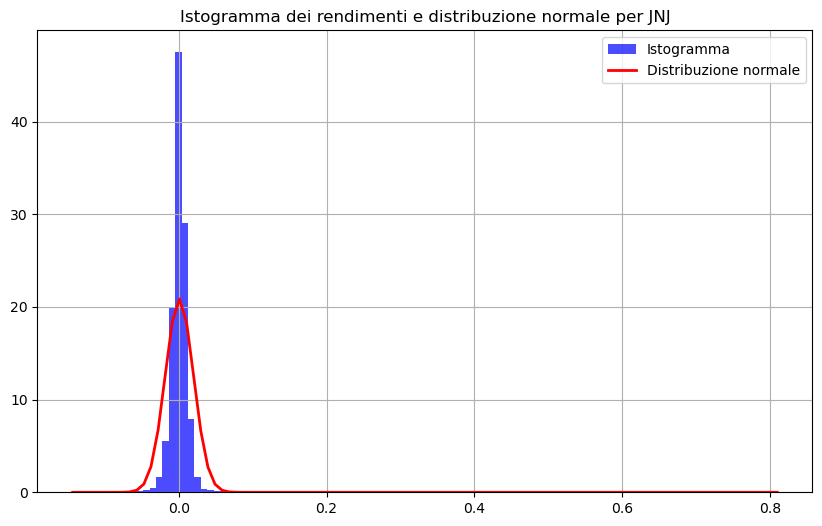

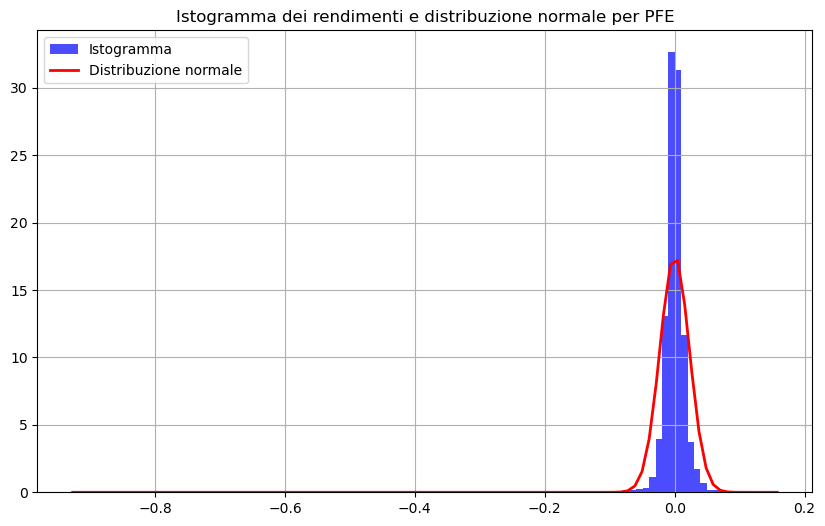

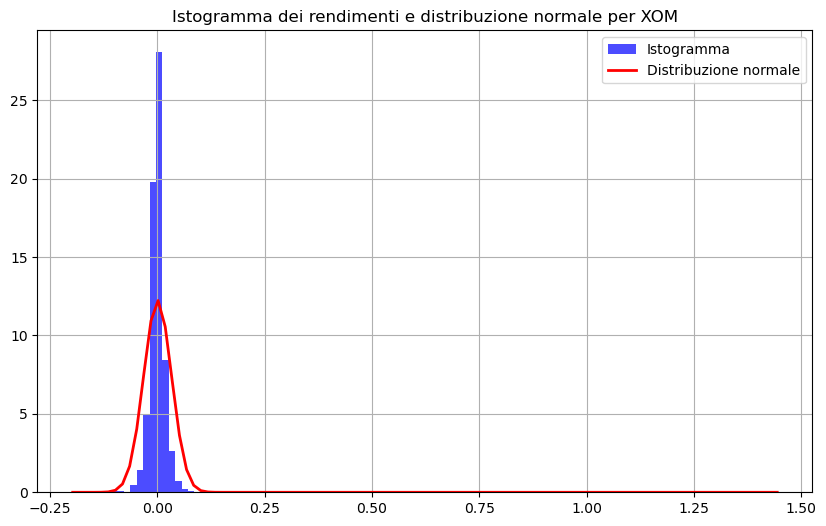

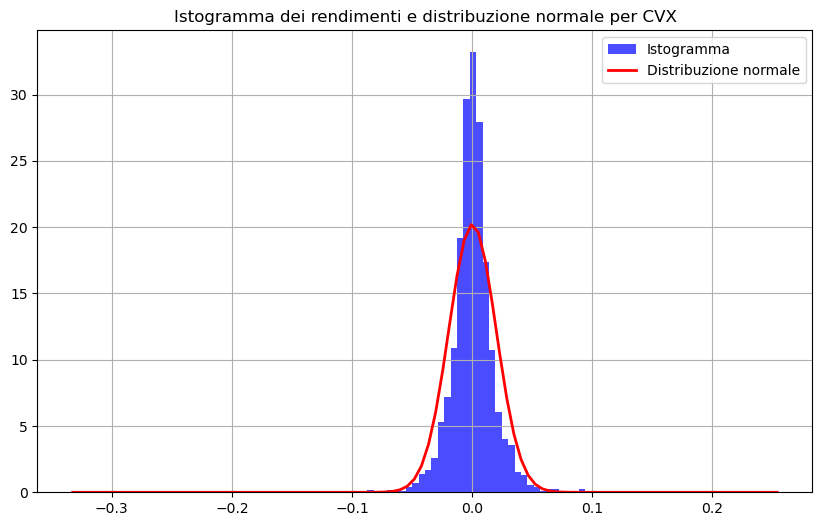

In [209]:
#istogrammi e normalità
from scipy.stats import norm
for ticker in tickers:
    
    plt.figure(figsize=(10, 6))
    plt.hist(all_data.loc[ticker]['RS_Netto'], bins=100, density=True, alpha=0.7, color='blue', label='Istogramma')
    
    mu, std = np.mean(all_data.loc[ticker]['RS_Netto']), np.std(all_data.loc[ticker]['RS_Netto'])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    plt.plot(x, p, 'r', linewidth=2, label='Distribuzione normale')
    plt.xlabel='Valore'
    plt.ylabel='Frequenza'
    plt.title(f'Istogramma dei rendimenti e distribuzione normale per {ticker}')
    plt.legend()
    plt.grid()
    plt.ylim=(0, 0.1)
    plt.show()

In [ ]:
#i titoli il quale rendimento semplice netto rispecchia una nrmale sono GOOGL e CVX

In [58]:
#rtabella statistiche
stat = {'Ticker': [], 'Mean': [], 'Std': [], 'Max':[], 'Min':[], 'Asimm':[]}
for ticker in tickers:
    mean = np.mean(all_data.loc[ticker]['RS_Netto'])
    std = np.std(all_data.loc[ticker]['RS_Netto'])
    max=np.max(all_data.loc[ticker]['RS_Netto'])
    min=np.min(all_data.loc[ticker]['RS_Netto'])
    asimm=all_data.loc[ticker]['RS_Netto'].skew(skipna = True)
    stat['Ticker'].append(ticker)
    stat['Mean'].append(mean)
    stat['Std'].append(std)
    stat['Max'].append(max)
    stat['Min'].append(min)
    stat['Asimm'].append(asimm)

stat_df = pd.DataFrame(stat)
stat_df.set_index('Ticker', inplace=True)

stat_df    

Mean       Std       Max       Min      Asimm
Ticker                                                   
GOOGL   0.000834  0.017649  0.162584 -0.116341   0.205959
INTC    0.000175  0.027188  0.195213 -0.862373 -12.978078
JNJ     0.000658  0.019131  0.766442 -0.100379  25.879943
PFE    -0.000110  0.022724  0.108552 -0.877425 -23.183066
XOM     0.000940  0.032627  1.369436 -0.122248  29.842500
CVX     0.000323  0.019730  0.227407 -0.305878  -1.661859

In [60]:
all_data_y = all_data.groupby([pd.Grouper(level='Ticker'), pd.Grouper(level='Date', freq='Y')]).last()
all_data_w = all_data.groupby([pd.Grouper(level='Ticker'), pd.Grouper(level='Date', freq='W')]).last()
all_data_m = all_data.groupby([pd.Grouper(level='Ticker'), pd.Grouper(level='Date', freq='M')]).last()
all_data_q = all_data.groupby([pd.Grouper(level='Ticker'), pd.Grouper(level='Date', freq='Q')]).last()

In [62]:
volatility = {'Ticker': [], 'Day': [], 'Week': [], 'Month':[], 'Quarter':[], 'Year':[]}
for ticker in tickers:
    day=np.std(all_data.loc[ticker]['RS_Netto'])/np.mean(all_data.loc[ticker]['RS_Netto'])
    week=np.std(all_data.loc[ticker]['RS_Netto'])/np.mean(all_data_w.loc[ticker]['RS_Netto'])
    month=np.std(all_data_m.loc[ticker]['RS_Netto'])/np.mean(all_data_m.loc[ticker]['RS_Netto'])
    quart=np.std(all_data_q.loc[ticker]['RS_Netto'])/np.mean(all_data_q.loc[ticker]['RS_Netto'])
    year=np.std(all_data_y.loc[ticker]['RS_Netto'])/np.mean(all_data_y.loc[ticker]['RS_Netto'])
    volatility['Ticker'].append(ticker)
    volatility['Day'].append(day)
    volatility['Week'].append(week)
    volatility['Month'].append(month)
    volatility['Quarter'].append(quart)
    volatility['Year'].append(year)

volatility_df = pd.DataFrame(volatility)
volatility_df.set_index('Ticker', inplace=True)

volatility_df  

Day        Week      Month     Quarter        Year
Ticker                                                           
GOOGL    21.168011   32.726451 -17.681674 -178.078681   -1.550172
INTC    155.325846  -59.816959  32.020450    3.483231 -301.551582
JNJ      29.054152   81.815344  -4.084246  -26.144366   -8.231662
PFE    -206.199421   13.268947  27.519925    4.810056   12.464589
XOM      34.699508 -447.184003  -4.650671  -11.071296    9.330113
CVX      61.001313  182.939848  -7.974338   14.175380   -9.440409

In [64]:
covariance_matrix = all_data['RS_Netto'].unstack(level=0).cov()
covariance_matrix

Ticker     GOOGL      INTC       JNJ       PFE       XOM       CVX
Ticker                                                            
GOOGL   0.000312  0.000180  0.000070  0.000078  0.000096  0.000111
INTC    0.000180  0.000739 -0.000189  0.000397 -0.000352  0.000247
JNJ     0.000070 -0.000189  0.000366 -0.000186  0.000490 -0.000017
PFE     0.000078  0.000397 -0.000186  0.000517 -0.000412  0.000190
XOM     0.000096 -0.000352  0.000490 -0.000412  0.001065  0.000106
CVX     0.000111  0.000247 -0.000017  0.000190  0.000106  0.000389

In [76]:
correlation_matrix = all_data['RS_Netto'].unstack(level=0).corr()
correlation_matrix

Ticker     GOOGL      INTC       JNJ       PFE       XOM       CVX
Ticker                                                            
GOOGL   1.000000  0.486688  0.349658  0.307817  0.309032  0.335254
INTC    0.486688  1.000000 -0.360374  0.641665 -0.399935  0.462173
JNJ     0.349658 -0.360374  1.000000 -0.425515  0.785231 -0.047926
PFE     0.307817  0.641665 -0.425515  1.000000 -0.558832  0.428301
XOM     0.309032 -0.399935  0.785231 -0.558832  1.000000  0.154236
CVX     0.335254  0.462173 -0.047926  0.428301  0.154236  1.000000

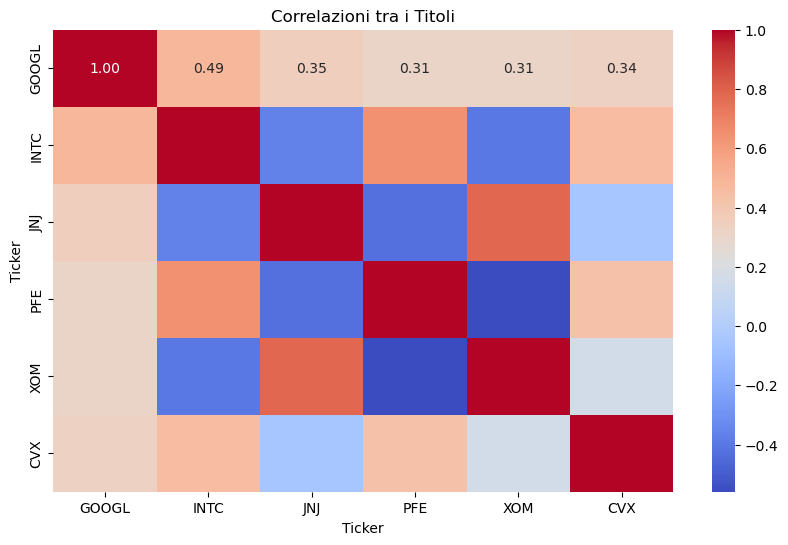

In [78]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlazioni tra i Titoli')
plt.xlabel('Ticker')
plt.ylabel('Ticker')
plt.show()
    

In [359]:
xom_data = all_data.loc['XOM']
cvx_data = all_data.loc['CVX']
googl_data=all_data.loc['GOOGL']
intc_data=all_data.loc['INTC']
jnj_data=all_data.loc['JNJ']
pfe_data=all_data.loc['PFE']

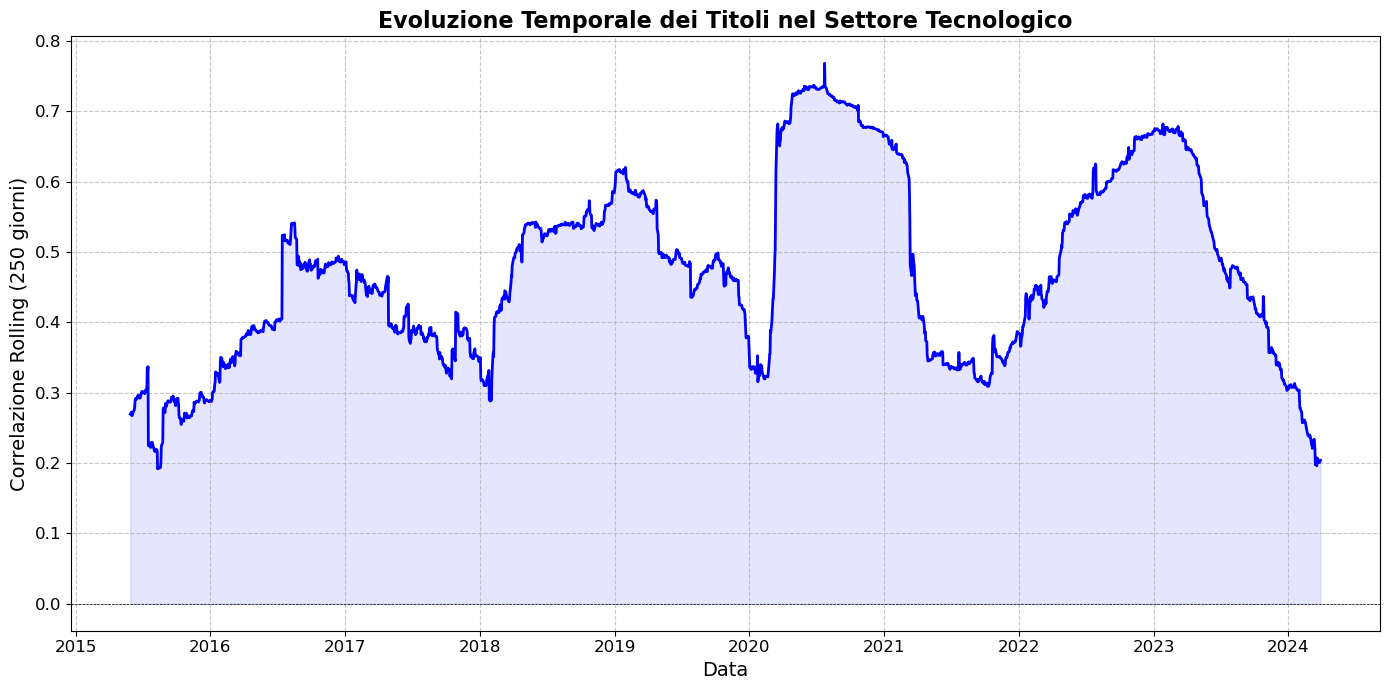

In [369]:
#correlazione settore tecnologico
rolling_corr = googl_data['RS_Netto'].rolling(250).corr(intc_data['RS_Netto'])

plt.figure(figsize=(14, 7))
plt.plot(rolling_corr, color='blue', linewidth=2)

plt.title('Evoluzione Temporale dei Titoli nel Settore Tecnologico', fontsize=16, weight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Correlazione Rolling (250 giorni)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.fill_between(rolling_corr.index, rolling_corr, color='blue', alpha=0.1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

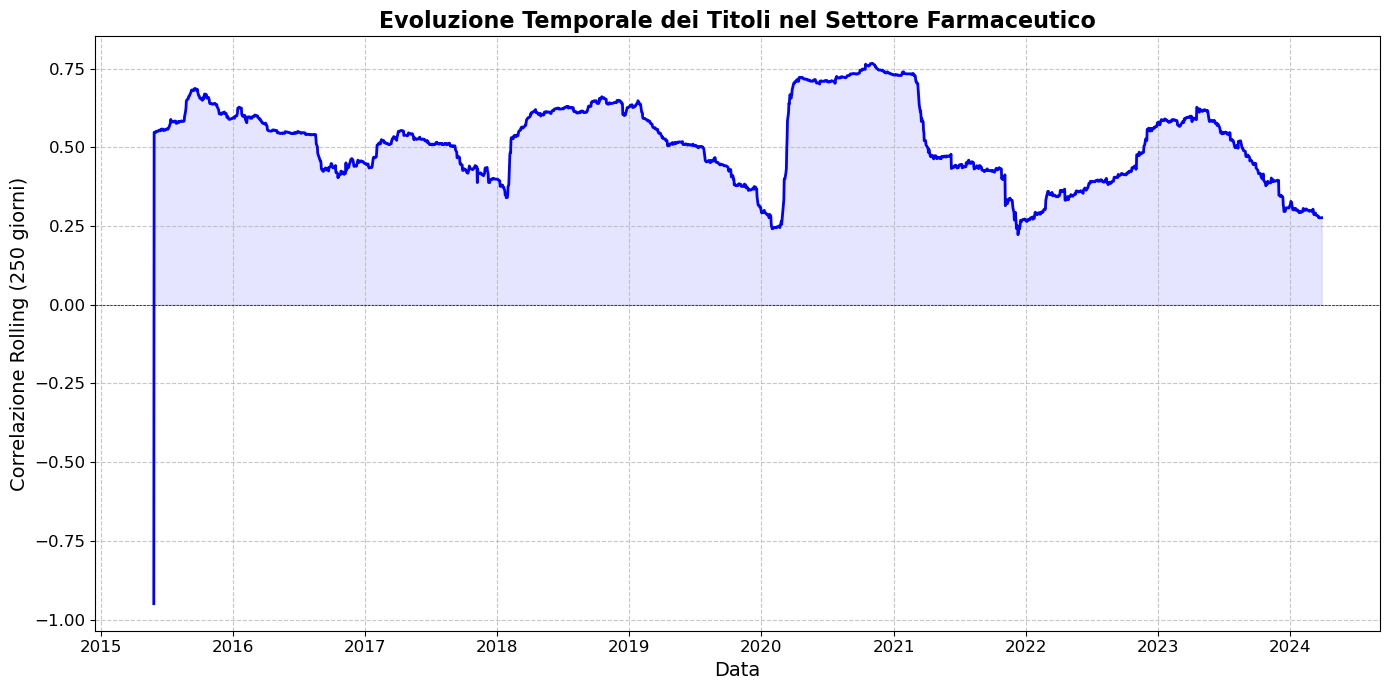

In [371]:
# Correlazione settore Farmaceutico
rolling_corr = jnj_data['RS_Netto'].rolling(250).corr(pfe_data['RS_Netto'])

plt.figure(figsize=(14, 7))
plt.plot(rolling_corr, color='blue', linewidth=2)

plt.title('Evoluzione Temporale dei Titoli nel Settore Farmaceutico', fontsize=16, weight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Correlazione Rolling (250 giorni)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.fill_between(rolling_corr.index, rolling_corr, color='blue', alpha=0.1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

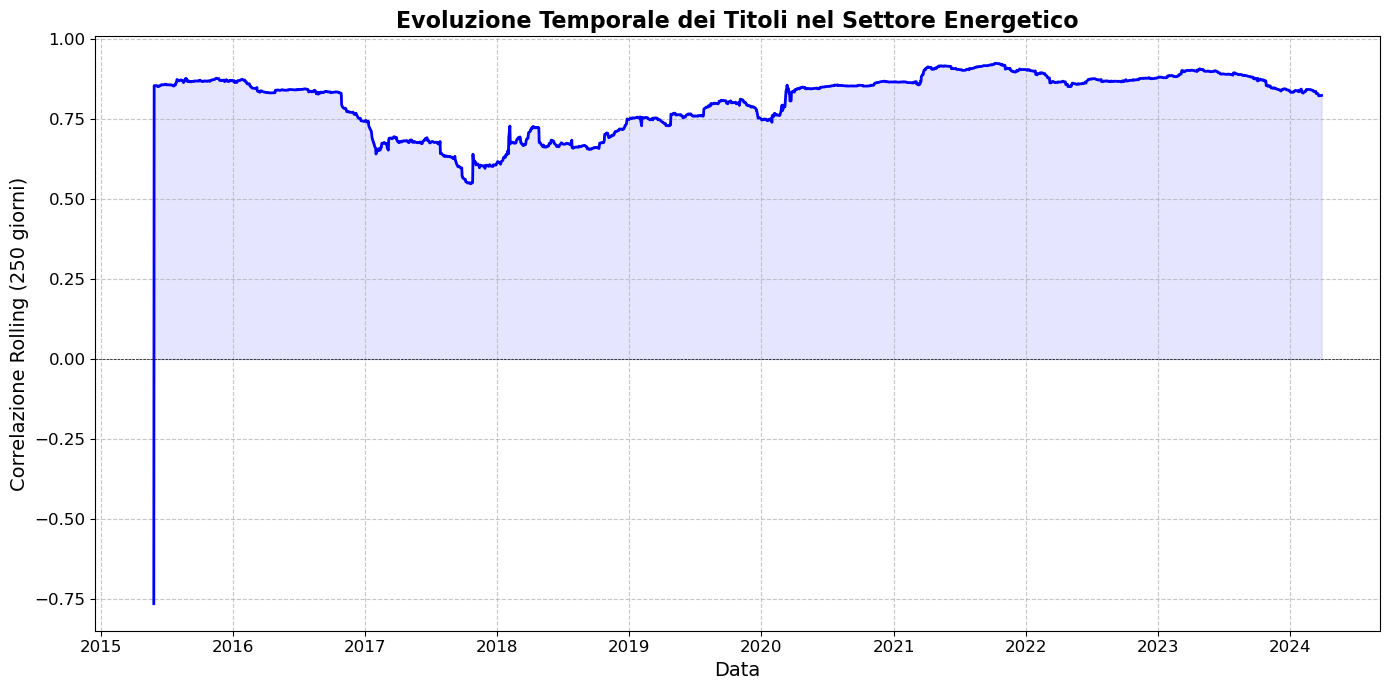

In [365]:
#Correlazione settore energetico
rolling_corr = xom_data['RS_Netto'].rolling(250).corr(cvx_data['RS_Netto'])

plt.figure(figsize=(14, 7))
plt.plot(rolling_corr, color='blue', linewidth=2)

plt.title('Evoluzione Temporale dei Titoli nel Settore Energetico', fontsize=16, weight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Correlazione Rolling (250 giorni)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.fill_between(rolling_corr.index, rolling_corr, color='blue', alpha=0.1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

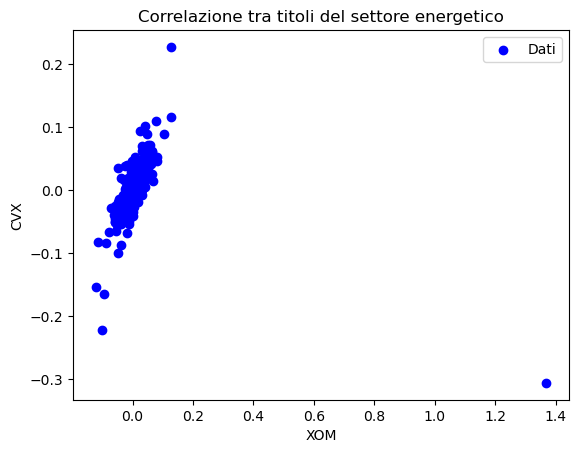

In [72]:

plt.scatter(xom_data['RS_Netto'], cvx_data['RS_Netto'], color='blue', label='Dati')
plt.title('Correlazione tra titoli del settore energetico')
plt.xlabel('XOM')
plt.ylabel('CVX')
plt.legend()
plt.show() 

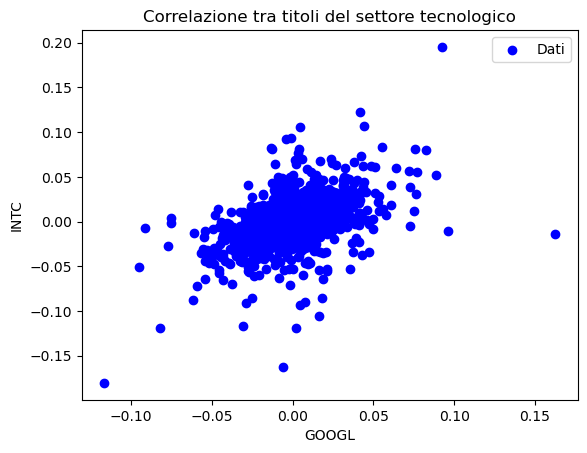

In [74]:
plt.scatter(googl_data['RS_Netto'], intc_data['RS_Netto'], color='blue', label='Dati')
plt.title('Correlazione tra titoli del settore tecnologico')
plt.xlabel('GOOGL')
plt.ylabel('INTC')
plt.legend()
plt.show() 

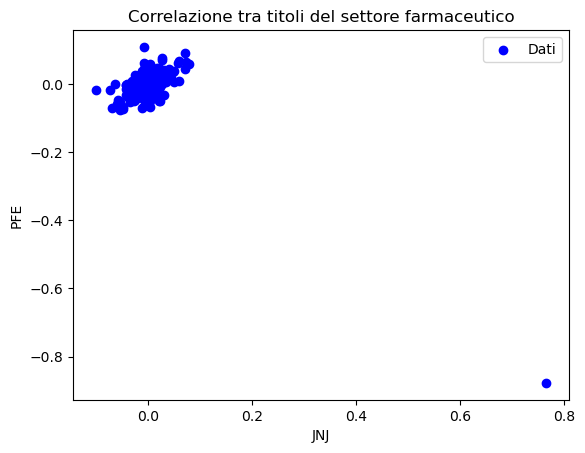

In [76]:
plt.scatter(jnj_data['RS_Netto'], pfe_data['RS_Netto'], color='blue', label='Dati')
plt.title('Correlazione tra titoli del settore farmaceutico')
plt.xlabel('JNJ')
plt.ylabel('PFE')
plt.legend()
plt.show() 

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import date, datetime


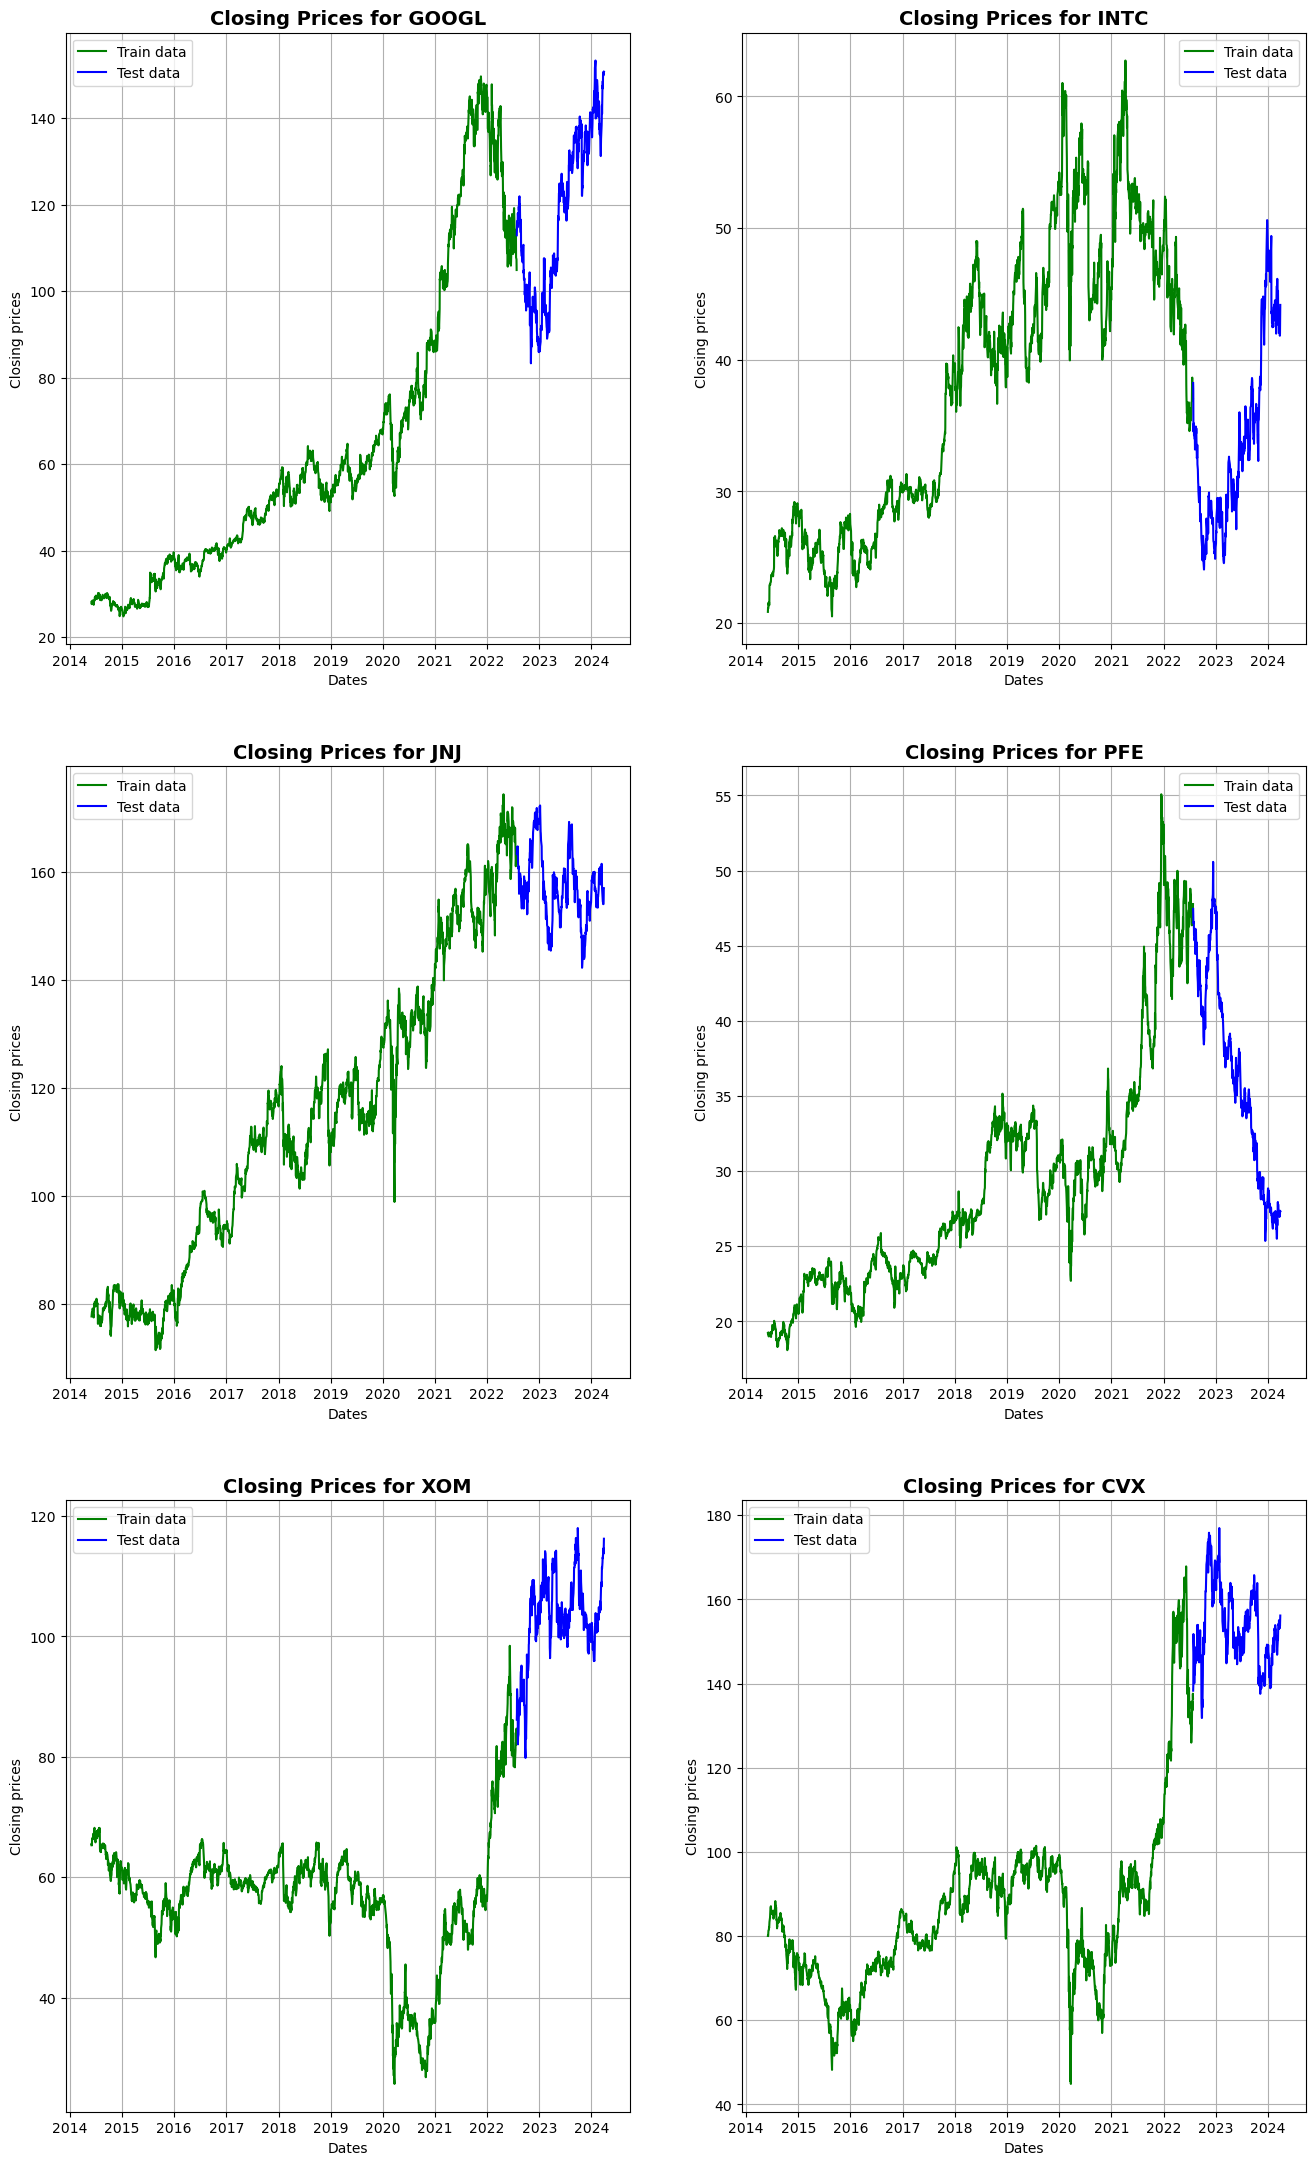

In [82]:
#modello predittivo

tickers = ['GOOGL', 'INTC', 'JNJ', 'PFE', 'XOM', 'CVX']

num_plots_per_row = 2

num_rows = (len(tickers) + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(16, 9 * num_rows))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    ticker_data = all_data.loc[ticker]
    to_row = int(len(ticker_data) * 0.83)
  
    axes[i].grid(True)
    axes[i].set_xlabel('Dates')
    axes[i].set_ylabel('Closing prices')
    axes[i].plot(ticker_data[0:to_row]['Adj Close'], 'green', label='Train data')
    axes[i].plot(ticker_data[to_row:]['Adj Close'], 'blue', label='Test data')
    axes[i].legend()
    axes[i].set_title(f'Closing Prices for {ticker}', fontsize=14, fontweight='bold')


In [85]:
from statsmodels.tsa.arima.model import ARIMA

for ticker in tickers:r
    ticker_data = all_data.loc[ticker]

    to_row = int(len(ticker_data)*0.83)
    training_data = list(ticker_data[0:to_row]['Adj Close'])
    testing_data = list(ticker_data[to_row:]['Adj Close'])

    training_data = np.array(training_data)
    testing_data = np.array(testing_data)

    model_predictions = []
    n_test_obser = len(testing_data)

    model = ARIMA(training_data, order=(1, 1, 1))
    model_fit = model.fit()

    for i in range(n_test_obser):
        
        output = model_fit.forecast(steps=1)
        yhat = output[0]
        model_predictions.append(yhat)
    
        actual_test_value = testing_data[i]
    
        training_data = np.append(training_data, actual_test_value)
    
        model = ARIMA(training_data, order=(1, 1, 1))
        model_fit = model.fit()

    model_predictions = np.array(model_predictions)
    print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2474
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4536.672
Date:                Tue, 18 Jun 2024   AIC                           9079.345
Time:                        14:06:12   BIC                           9096.784
Sample:                             0   HQIC                          9085.680
                               - 2474                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8554      0.053     16.187      0.000       0.752       0.959
ma.L1         -0.8883      0.047    -18.898      0.000      -0.980      -0.796
sigma2         2.2958      0.029     79.922      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2474
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1684.046
Date:                Tue, 18 Jun 2024   AIC                           3374.091
Time:                        14:07:35   BIC                           3391.531
Sample:                             0   HQIC                          3380.426
                               - 2474                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0004      0.540     -0.001      0.999      -1.059       1.058
ma.L1         -0.0217      0.540     -0.040      0.968      -1.080       1.036
sigma2         0.2286      0.003     75.559      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2474
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3711.141
Date:                Tue, 18 Jun 2024   AIC                           7428.282
Time:                        14:08:08   BIC                           7445.722
Sample:                             0   HQIC                          7434.617
                               - 2474                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8129      0.228      3.561      0.000       0.366       1.260
ma.L1         -0.8243      0.222     -3.707      0.000      -1.260      -0.389
sigma2         1.1776      0.020     59.484      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2474
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4879.704
Date:                Tue, 18 Jun 2024   AIC                           9765.409
Time:                        14:08:43   BIC                           9782.849
Sample:                             0   HQIC                          9771.744
                               - 2474                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5077      0.217     -2.341      0.019      -0.933      -0.083
ma.L1          0.4752      0.221      2.147      0.032       0.041       0.909
sigma2         3.0299      0.041     74.013      0.0

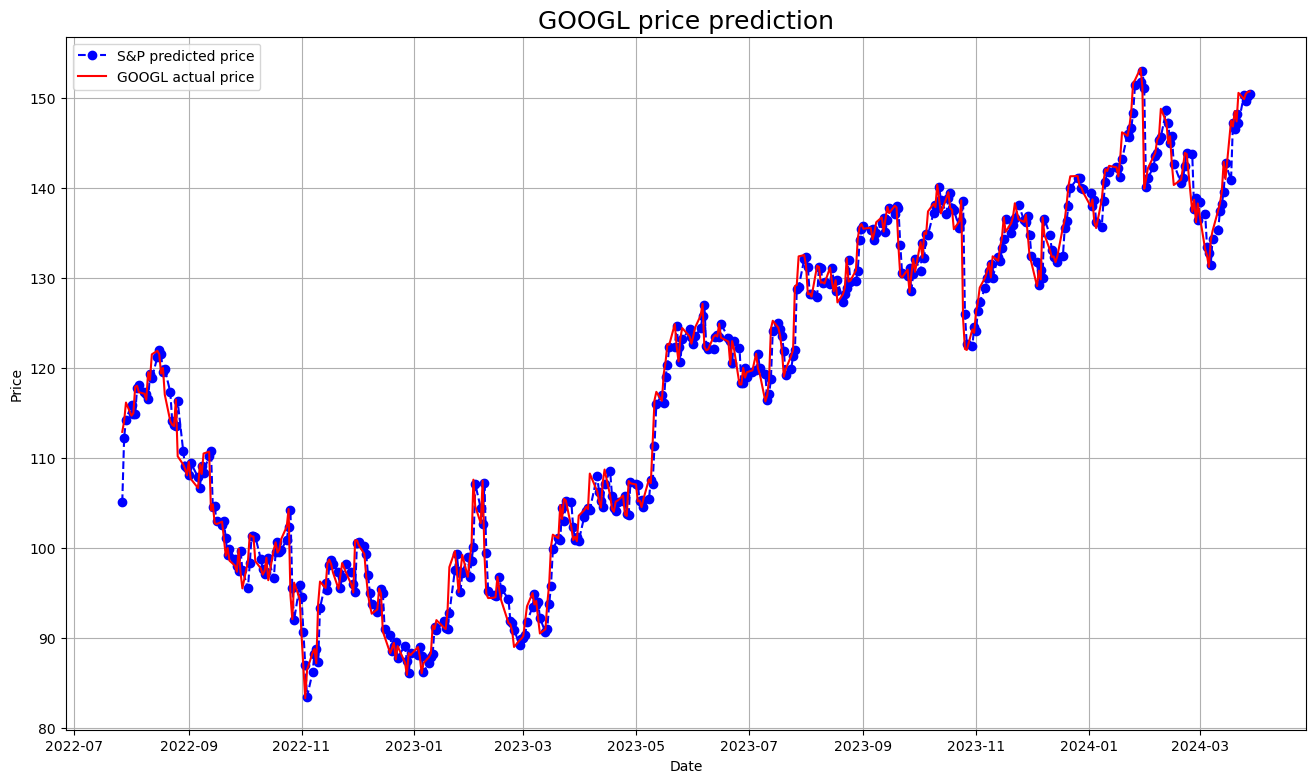

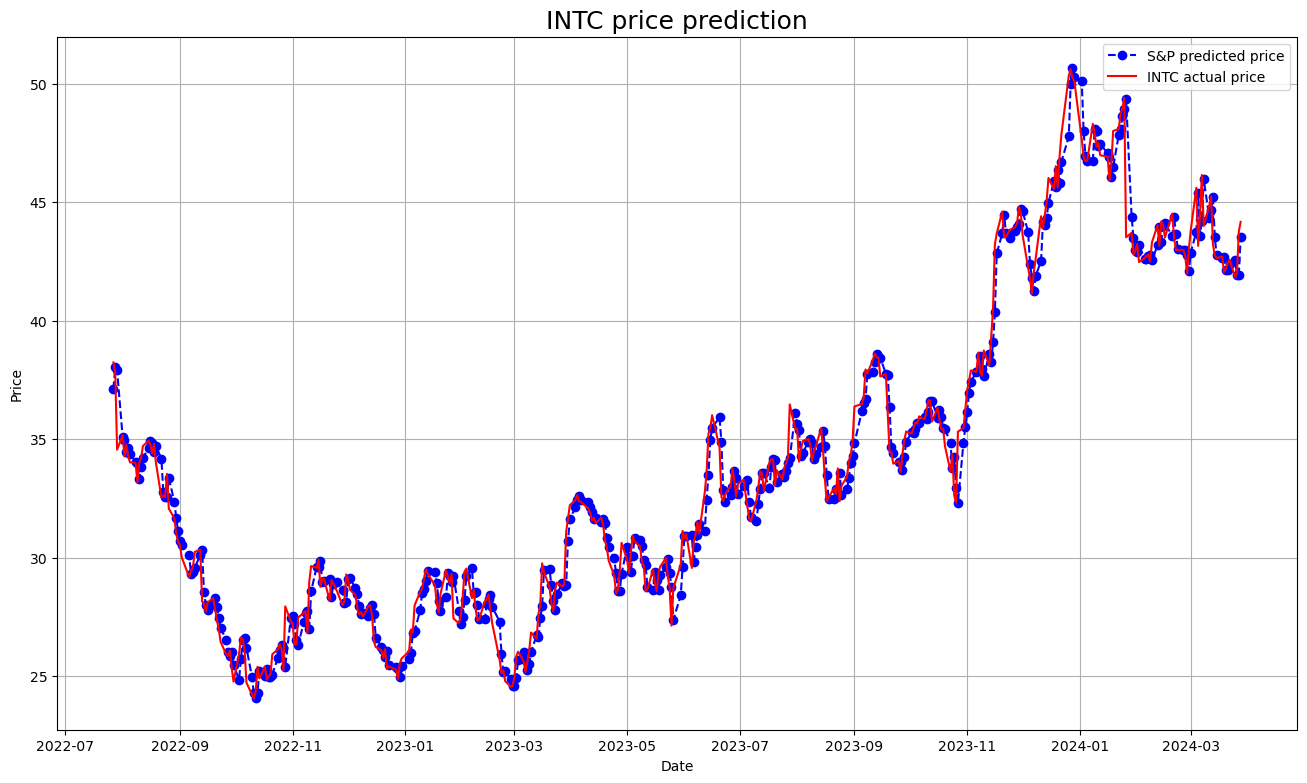

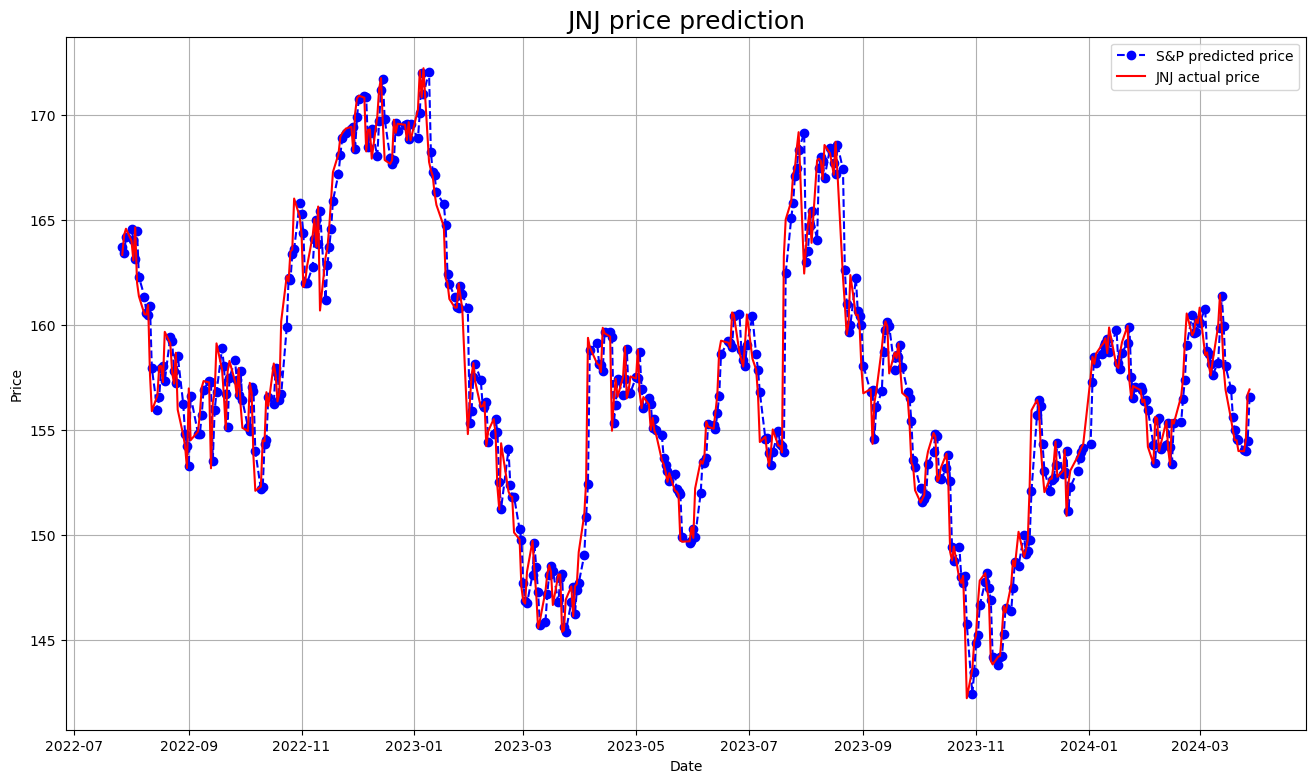

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


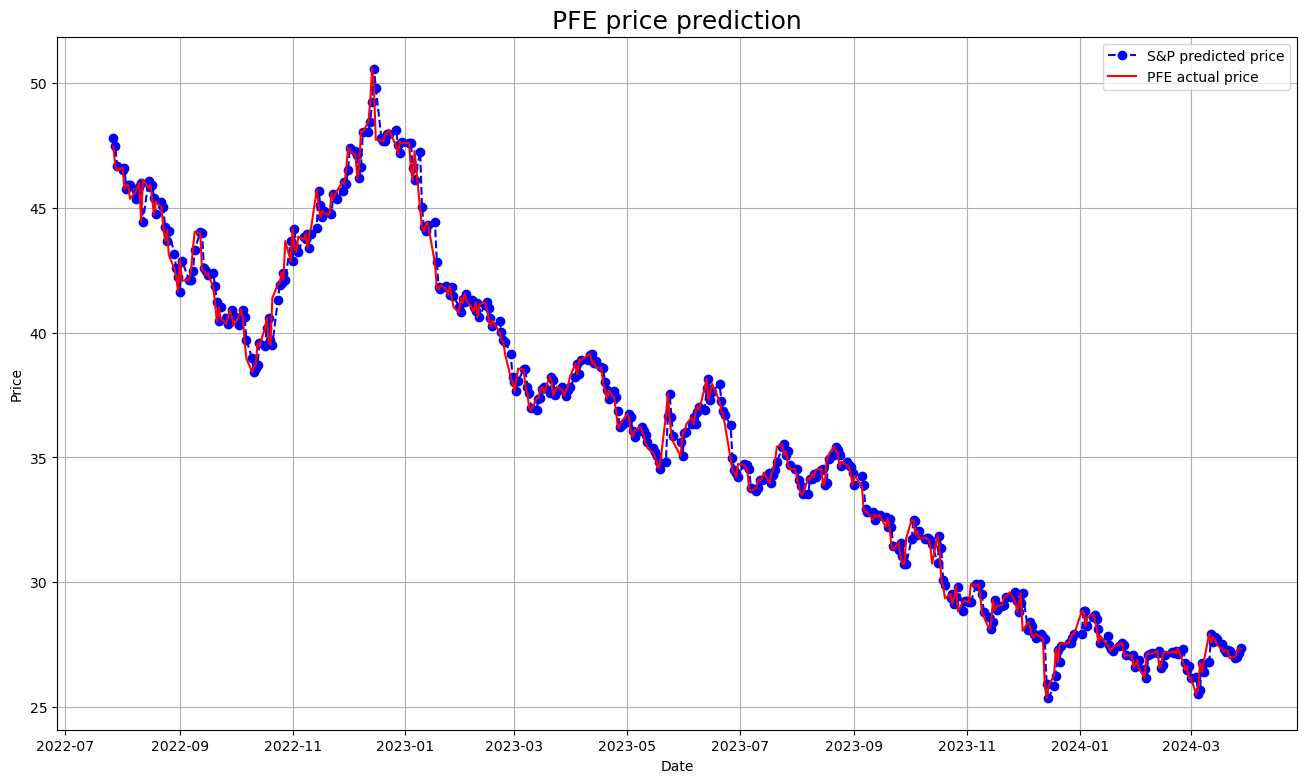

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


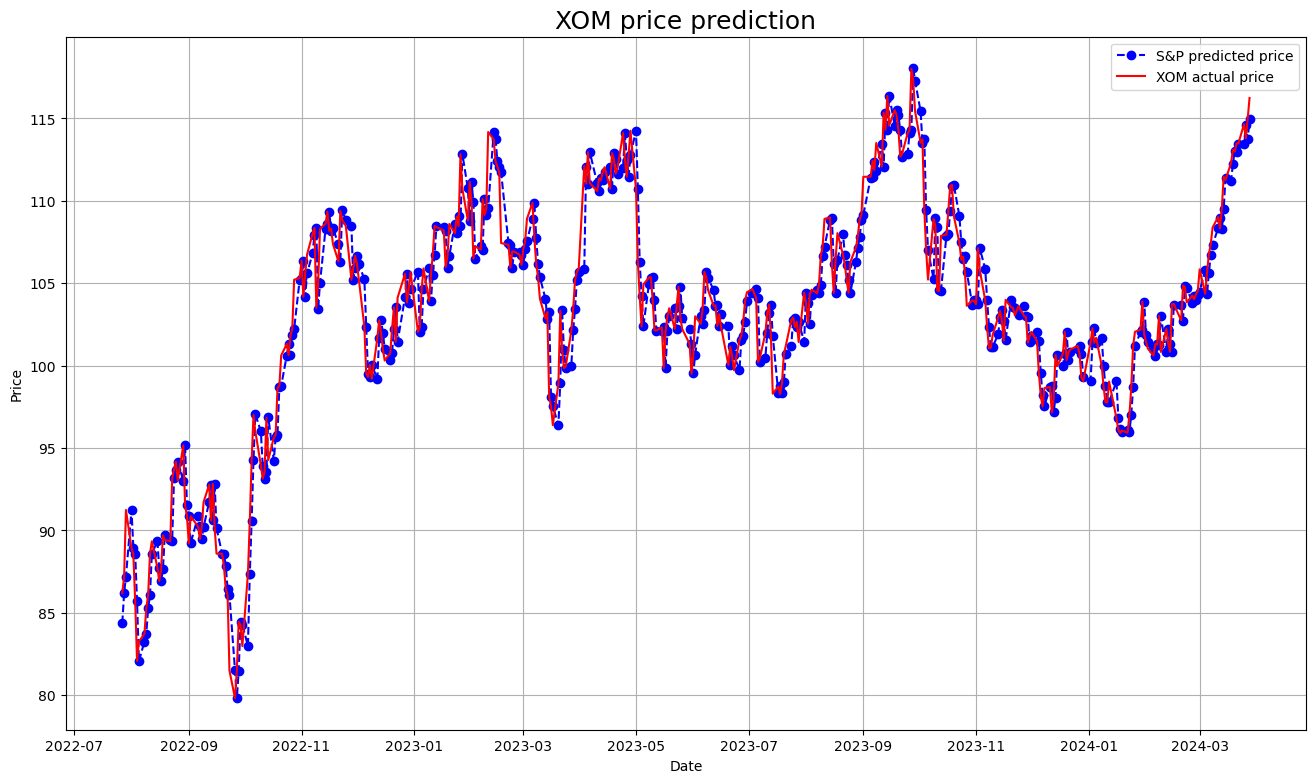

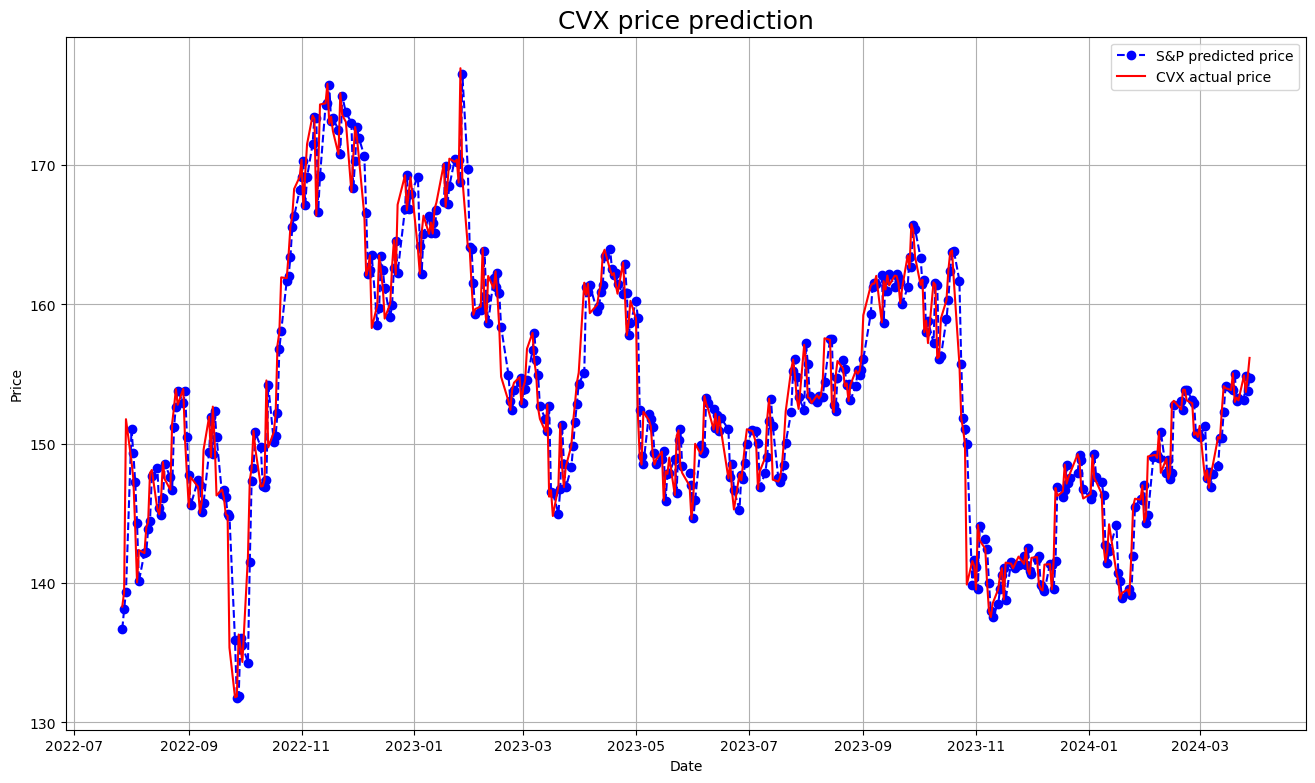

In [107]:
for ticker in tickers:
    
    ticker_data = all_data.loc[ticker]
    to_row = int(len(ticker_data)*0.83)
    training_data = list(ticker_data[0:to_row]['Adj Close'])
    testing_data = list(ticker_data[to_row:]['Adj Close'])
    training_data = np.array(training_data)
    testing_data = np.array(testing_data)

    model_predictions = []

    model = ARIMA(training_data, order=(1, 1, 1))
    model_fit = model.fit()

    for i in range(n_test_obser):
       
        output = model_fit.forecast(steps=1)
        yhat = output[0]
        model_predictions.append(yhat)
    
        actual_test_value = testing_data[i]
    
        training_data = np.append(training_data, actual_test_value)
    
        model = ARIMA(training_data, order=(1, 1, 1))
        model_fit = model.fit()

    model_predictions = np.array(model_predictions)
    plt.figure(figsize=(16,9))
    plt.grid(True)
    date_range = ticker_data[to_row:].index
    plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'S&P predicted price' )
    plt.plot(date_range, testing_data, color = 'red', label = f'{ticker} actual price' )
    plt.title(f'{ticker} price prediction', fontsize=18)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.savefig(f"/Users/computer/Desktop/{ticker}_graf.png")
    plt.show()


In [101]:
import matplotlib.dates as mdates

/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA20'] = data['Adj Close'].rolling(20).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA120'] = data['Adj Close'].rolling(120).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

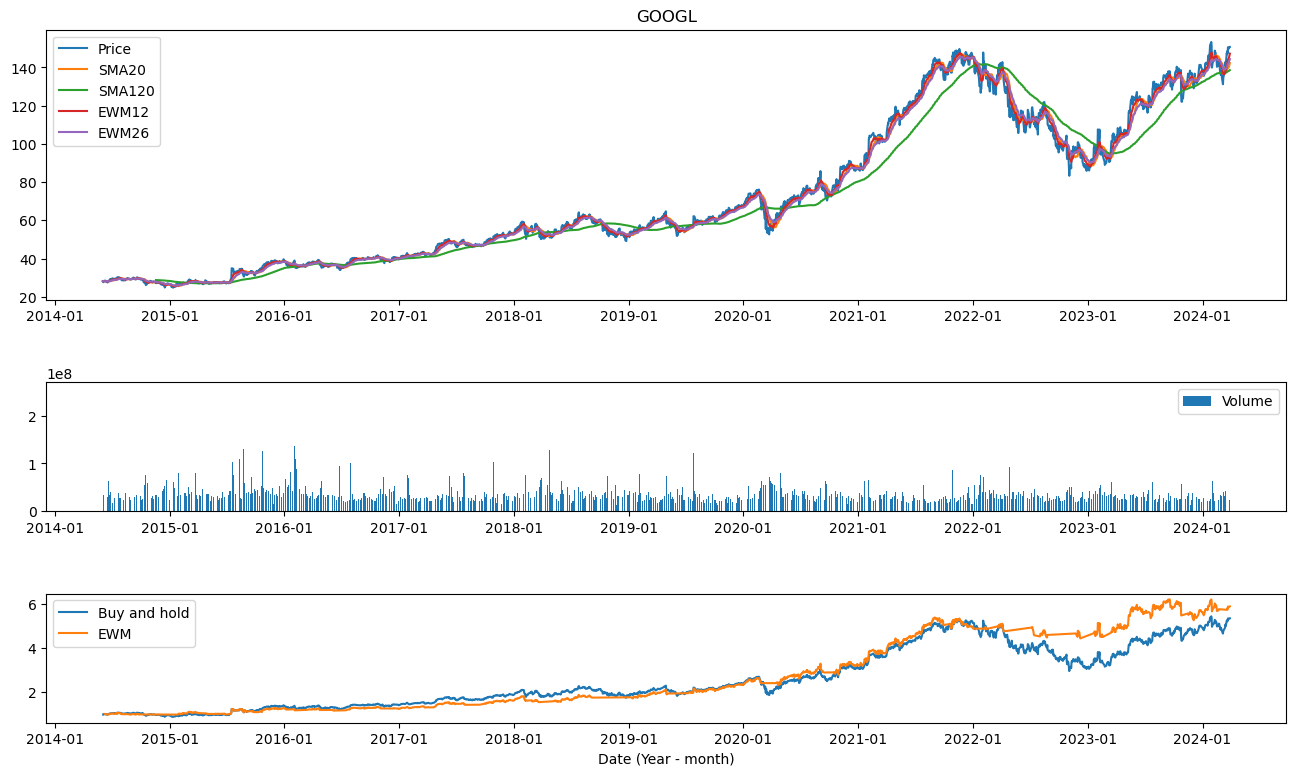

/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA20'] = data['Adj Close'].rolling(20).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA120'] = data['Adj Close'].rolling(120).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

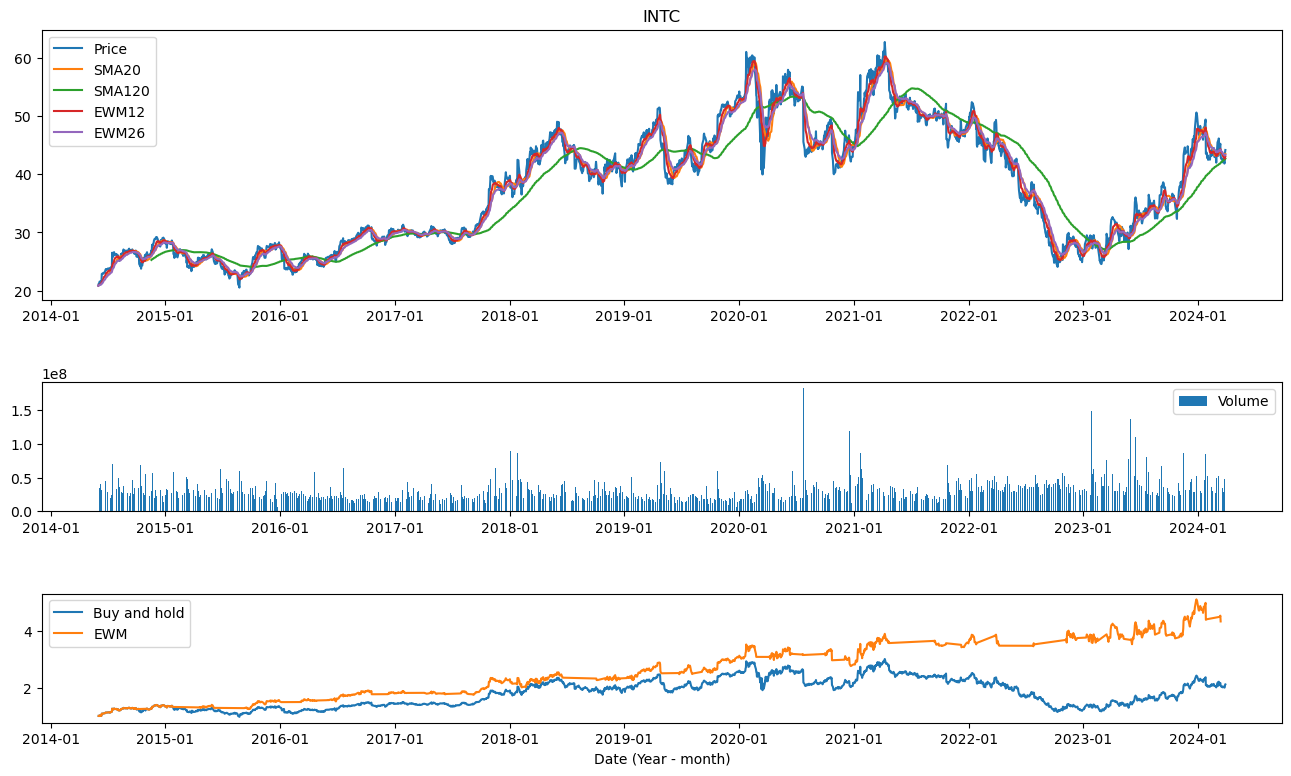

/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA20'] = data['Adj Close'].rolling(20).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA120'] = data['Adj Close'].rolling(120).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

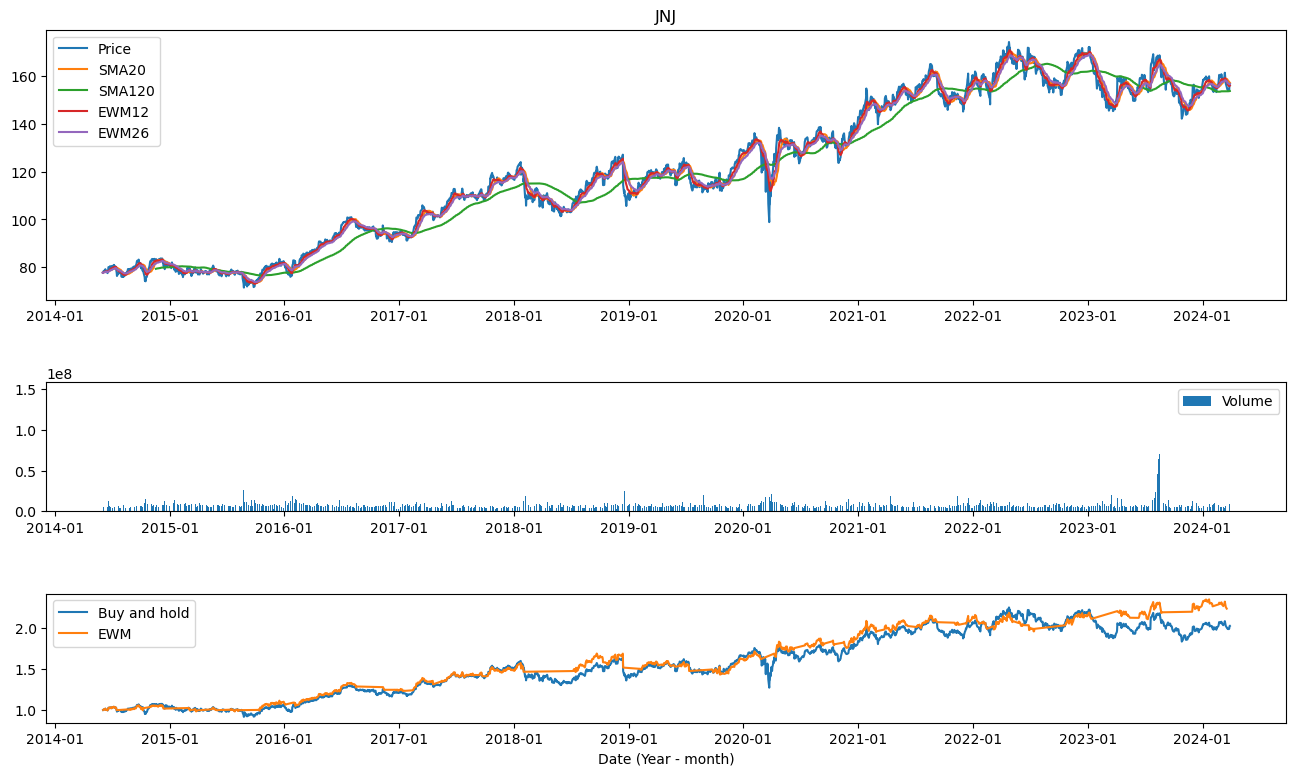

/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA20'] = data['Adj Close'].rolling(20).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA120'] = data['Adj Close'].rolling(120).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

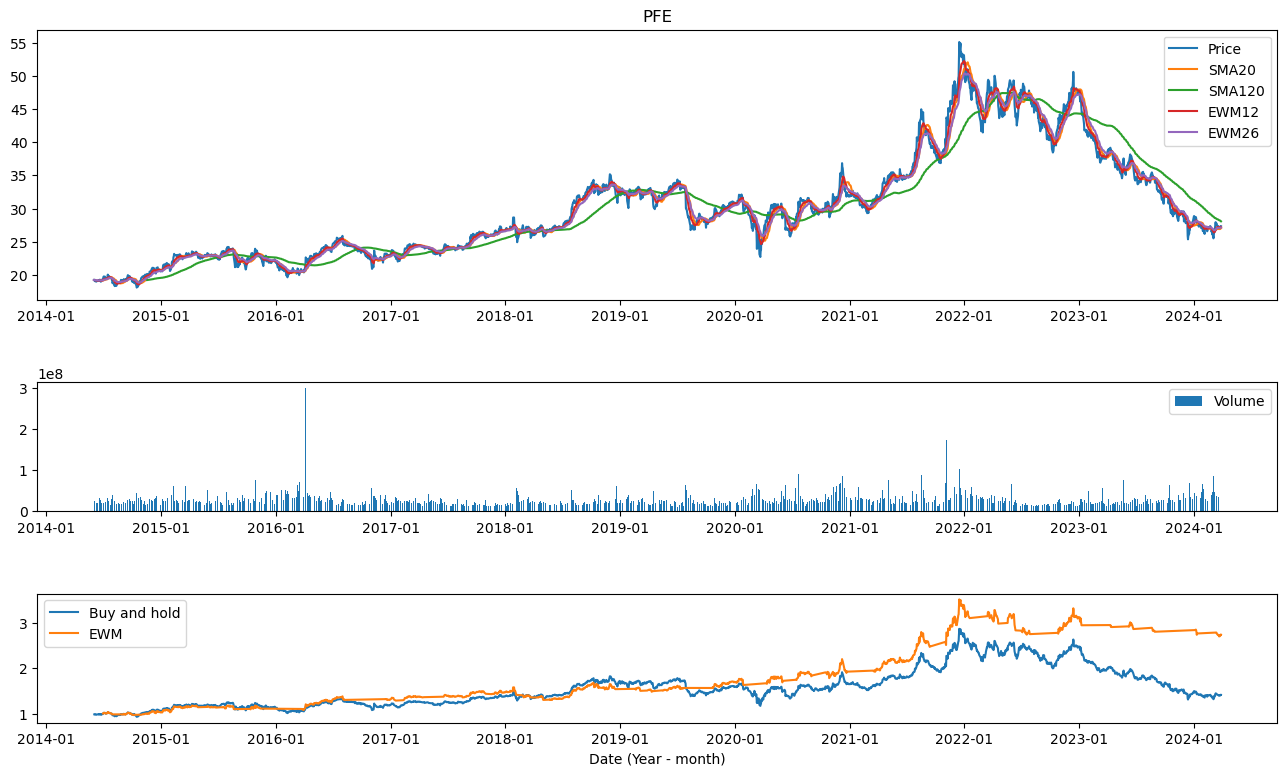

/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA20'] = data['Adj Close'].rolling(20).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA120'] = data['Adj Close'].rolling(120).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

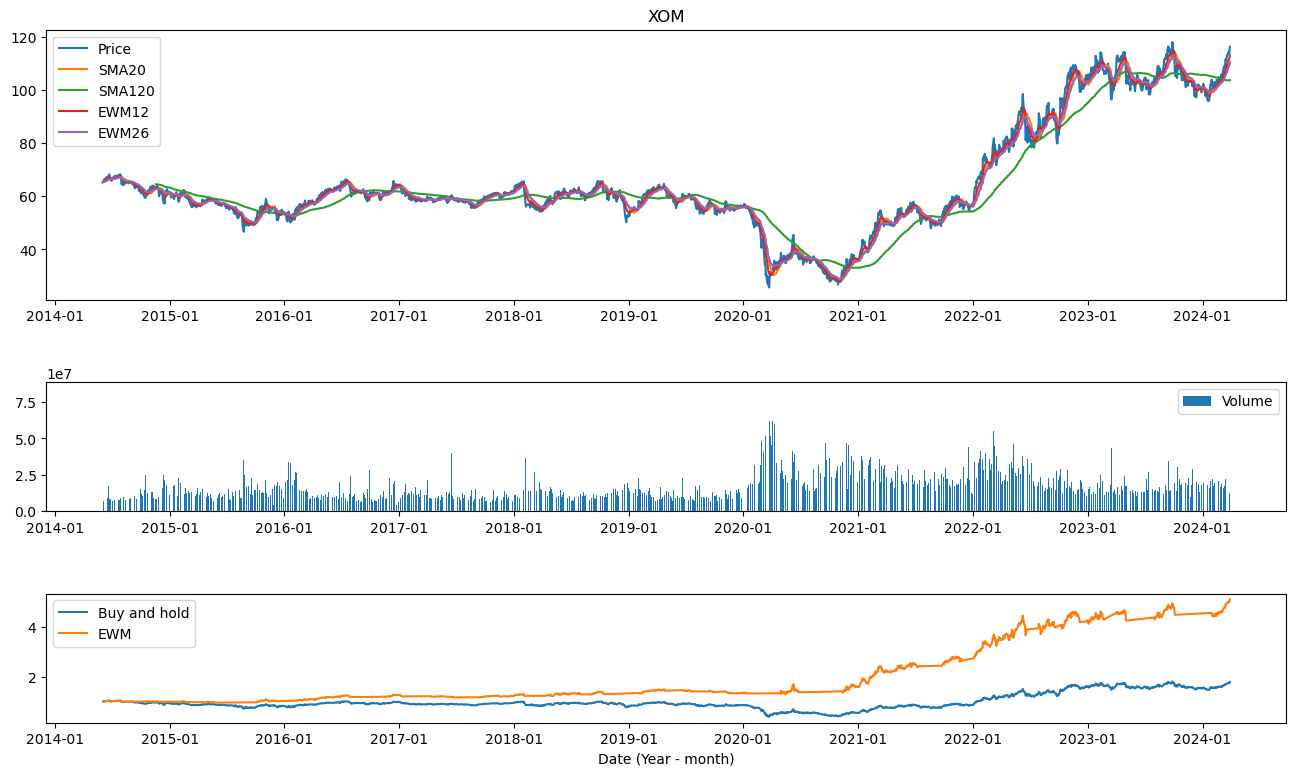

/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA20'] = data['Adj Close'].rolling(20).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA120'] = data['Adj Close'].rolling(120).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3025504641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

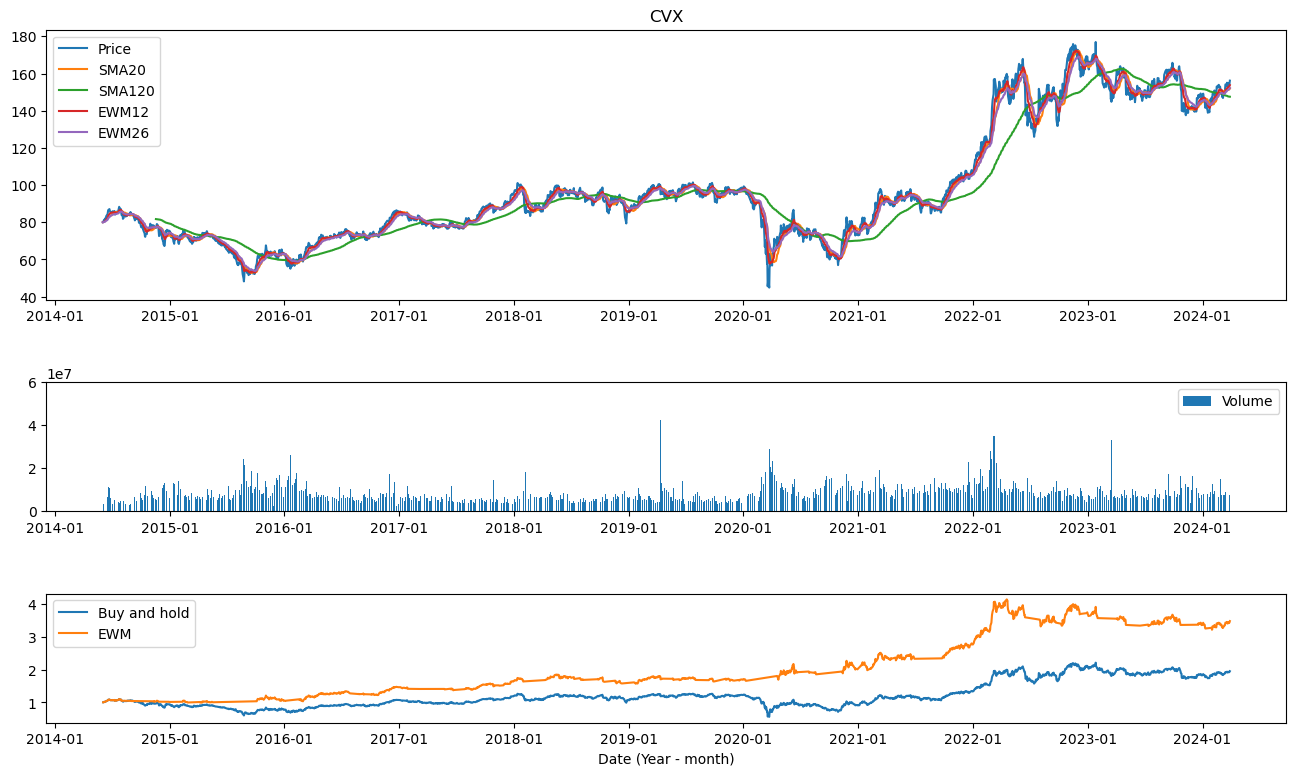

In [105]:
#tecniche di trading

for ticker in tickers:
    data = all_data.loc[ticker]
    data['SMA20'] = data['Adj Close'].rolling(20).mean()
    data['SMA120'] = data['Adj Close'].rolling(120).mean()
    data['EWM12'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
    data['EWM26'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
    data.loc[:,'Price_yesterday'] = data['Adj Close'].shift(1)
    data.loc[:,'Change'] = data['Adj Close'] / data['Price_yesterday']
    data.loc[:,'Invested_SMA'] = [1 if data.loc[i, 'SMA20'] > data.loc[i, 'SMA120'] 
                        else 0 for i in data.index]
    data.loc[:,'Invested_EWM'] = [1 if data.loc[i, 'EWM12'] > data.loc[i, 'EWM26'] 
                        else 0 for i in data.index]
    data.loc[:,'Buy_and_hold'] = np.cumprod(data['Change'])
    sma = data[data['Invested_SMA'] == 1].copy()
    sma.loc[:,'Return'] = np.cumprod(sma['Change'])
    ewm = data[data['Invested_EWM'] == 1].copy()
    ewm.loc[:,'Return'] = np.cumprod(ewm['Change'])
    
    plt.figure(figsize=(16,9))
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
    ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
    ax3 = plt.subplot2grid((10,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)
    ax1.plot(data['Adj Close'], label = 'Price')
    ax1.plot(data['SMA20'], label = 'SMA20')
    ax1.plot(data['SMA120'], label = 'SMA120')
    ax1.plot(data['EWM12'], label = 'EWM12')
    ax1.plot(data['EWM26'], label = 'EWM26')

    ax2.bar(data.index, data['Volume'], label = 'Volume')
    ax3.plot(data['Buy_and_hold'], label = 'Buy and hold')
    #ax3.plot(sma['Return'], label = 'SMA')
    ax3.plot(ewm['Return'], label ='EWM')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax3.set_xlabel('Date (Year - month)')
    ax1.legend()
    ax2.legend()
    ax3.legend()
    plt.savefig(f"/Users/computer/Desktop/{ticker}_graf.png")
    plt.show()

In [297]:
for ticker in tickers:
    data = all_data.loc[ticker]
    data.loc[:,'SMA20'] = data['Adj Close'].rolling(20).mean()
    data.loc[:,'SMA120'] = data['Adj Close'].rolling(120).mean()
    data.loc[:,'EWM12'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
    data.loc[:,'EWM26'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
    data.loc[:,'Price_yesterday'] = data['Adj Close'].shift(1)
    data.loc[:,'Change'] = data['Adj Close'] / data['Price_yesterday']
    data.loc[:,'Invested_SMA'] = [1 if data.loc[i, 'SMA20'] > data.loc[i, 'SMA120'] 
                        else 0 for i in data.index]
    data.loc[:,'Invested_EWM'] = [1 if data.loc[i, 'EWM12'] > data.loc[i, 'EWM26'] 
                        else 0 for i in data.index]
    data.loc[:,'Buy_and_hold'] = np.cumprod(data['Change'])
    sma = data[data['Invested_SMA'] == 1].copy()
    sma.loc[:,'Return'] = np.cumprod(sma['Change'])
    ewm = data[data['Invested_EWM'] == 1].copy()
    ewm.loc[:,'Return'] = np.cumprod(ewm['Change'])
    print('Buy and hold strategy return: ' + ticker + ' '+   str(data['Buy_and_hold'][-1]))
    print('SMA return: ' + ticker + ' ' + str(sma['Return'][-1]))
    print('EWM return: ' + ticker + ' ' + str(ewm['Return'][-1]))

/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_22913/1143661463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'SMA20'] = data['Adj Close'].rolling(20).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_22913/1143661463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'SMA120'] = data['Adj Close'].rolling(120).mean()
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_22913/1143661463.py:5: SettingWithCopyWarning: 
A value is trying to be set o

Buy and hold strategy return: GOOGL 5.34890306326272
SMA return: GOOGL 3.512923290644119
EWM return: GOOGL 5.888997253617071
Buy and hold strategy return: INTC 2.1178117564936705
SMA return: INTC 1.2280672800190044
EWM return: INTC 4.320711954137239
Buy and hold strategy return: JNJ 2.019371138513618
SMA return: JNJ 1.0477431613032393
EWM return: JNJ 2.2284638603024485
Buy and hold strategy return: PFE 1.4212713722347354
SMA return: PFE 0.8674323418390258
EWM return: PFE 2.7358539427379647
Buy and hold strategy return: XOM 1.780061591112362
SMA return: XOM 1.853469340187038
EWM return: XOM 5.09167905303656
Buy and hold strategy return: CVX 1.9511926534840873
SMA return: CVX 1.060434199118035
EWM return: CVX 3.4777939192452942


/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_22913/1143661463.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Buy and hold strategy return: ' + ticker + ' '+   str(data['Buy_and_hold'][-1]))
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_22913/1143661463.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('SMA return: ' + ticker + ' ' + str(sma['Return'][-1]))
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_22913/1143661463.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 

In [315]:
#calcolo i beta 

beta={}
for ticker in tickers:
    data = all_data.loc[ticker]
    risky_asset = ticker
    market_benchmark = '^GSPC' # S&P 500
    start_date = '2014-05-31'
    end_date = '2024-04-30'
    df = yf.download([risky_asset, market_benchmark],
                       start = start_date, end = end_date)
    X = df['Adj Close'].rename(columns={risky_asset:'asset', market_benchmark:'market'})\
    .resample('M').last().pct_change().dropna()
    covariance = X.cov().iloc[0,1] 
    benchmark_variance = X.market.var()
    b= covariance / benchmark_variance
    beta[ticker]=b

print(beta)
    


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

{'GOOGL': 1.030312456718585, 'INTC': 0.9676085632346906, 'JNJ': 0.5751957722949503, 'PFE': 0.6560140266103617, 'XOM': 0.9569651223403852, 'CVX': 1.0901782874935355}


In [317]:
#Parametri CAPM
R_f = 0.02  
R_m = 0.08  

expected_returns = {}
for ticker, b in beta.items():
    R_i = R_f + b * (R_m - R_f)
    expected_returns[ticker] = R_i

print("\nRendimento atteso annuo dei titoli:")
for ticker, return_ in expected_returns.items():
    print(f"{ticker}: {return_ * 100:.2f}%")


Rendimento atteso annuo dei titoli:
GOOGL: 8.18%
INTC: 7.81%
JNJ: 5.45%
PFE: 5.94%
XOM: 7.74%
CVX: 8.54%


In [113]:
#Fama e French

factor_df = pd.read_csv('/Users/computer/Desktop/F-F_Research_Data_Factors.csv', skiprows=3)
ticker=['GOOGL','INTC','JNJ','PFE','XOM','CVX']
start_date = '2014-05-31'
end_date = '2024-03-31'

In [115]:
stringa = ' Annual Factors: January-December '
indices = factor_df.iloc[:,0] == stringa
start_of_annual = factor_df[indices].index[0]
factor_df = factor_df[factor_df.index < start_of_annual]

In [117]:
factor_df.columns = ['data', 'mkt', 'smb', 'hml', 'rf']

In [119]:
factor_df['data'] = pd.to_datetime(factor_df['data'], format='%Y%m').dt.strftime("%Y-%m")

In [121]:
factor_df = factor_df.set_index('data')
factor_df = factor_df[start_date:end_date]

In [123]:
factor_df = factor_df.apply(pd.to_numeric, errors='coerce').div(100)

In [127]:
import statsmodels.formula.api as smf
for ticker in tickers:
    risky_asset = ticker
    asset_df = yf.download(risky_asset, start_date, end_date)
    y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
    y.index = y.index.strftime('%Y-%m')
    y.name = 'rtn'
    ff_data = factor_df.join(y)
    ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
    ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
    print(f'Risultati della regressione per {ticker}:')
    print(ff_model.summary())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Risultati della regressione per GOOGL:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     36.93
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.03e-16
Time:                        17:13:03   Log-Likelihood:                 188.02
No. Observations:                 117   AIC:                            -368.0
Df Residuals:                     113   BIC:                            -357.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    

In [32]:
start = datetime.date(2014,5,31)
ritorni_semplici = daily_close_px.pct_change().dropna()
start_108 = ritorni_semplici.index.min()
end_108 = start + pd.DateOffset(months=108)

ritorni_semplici_108 = ritorni_semplici[ritorni_semplici.index < end_108]
ritorni_semplici_108.tail()


Ticker           CVX     GOOGL      INTC       JNJ       PFE       XOM
Date                                                                  
2023-05-23  0.028929 -0.019912 -0.025429 -0.000383  0.022968  0.013623
2023-05-24  0.002678 -0.013544 -0.017282 -0.000957 -0.025479  0.011184
2023-05-25 -0.017232  0.021340 -0.055172 -0.014362 -0.020709 -0.017938
2023-05-26 -0.003106  0.009151  0.058394 -0.000388 -0.006080 -0.006530
2023-05-30 -0.006231 -0.007544  0.034138  0.000129 -0.015691 -0.008860

In [34]:
from scipy.optimize import minimize
#costruzione dei portafogli
n_days = 3285


n_port=5**10
risky_assets = ['GOOGL','INTC','JNJ','PFE','XOM','CVX']
risky_assets.sort()
start_date = '2014-5-31'
end_date = '2024-5-24'
n_assets = len(risky_assets)
risky_assets

prices_df = yf.download(risky_assets, start_date, end_date) 
print(f'Downloaded {prices_df.shape[0]} rows of data.')

np.random.seed(42)
weights = np.random.random(size=(n_port, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

[*********************100%%**********************]  6 of 6 completed


Downloaded 2513 rows of data.


In [36]:
avg_returns = ritorni_semplici_108.mean() * n_days
cov_mat = ritorni_semplici_108.cov() * n_days
portf_rtns = np.dot(weights, avg_returns)

In [38]:

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, 
                                    np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)  
portf_sharpe_ratio = portf_rtns / portf_vol

In [39]:
portf_results_df = pd.DataFrame({'returns': portf_rtns,
                                 'volatility': portf_vol,
                                 'sharpe_ratio': portf_sharpe_ratio})

In [40]:

n_points = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), 
                            portf_results_df.returns.max(), 
                           n_points)
portf_rtns_ef = np.round(portf_rtns_ef, 2)    
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(n_points):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_42900/2305882691.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  ax.plot(portf_vol_ef, portf_rtns_ef, 'b--', color = 'red', linewidth = 2.5)
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_42900/2305882691.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=avg_returns[asset_index],


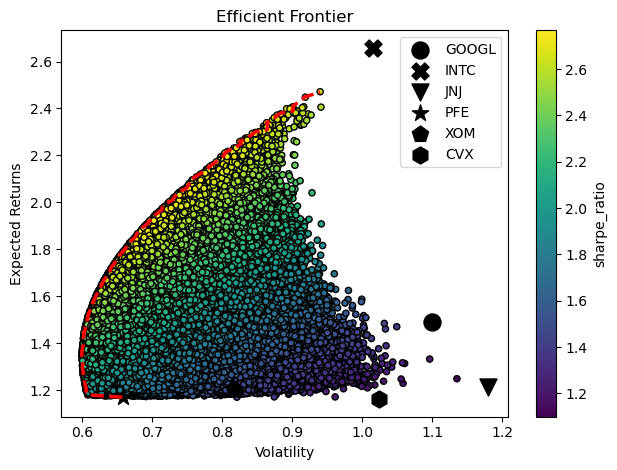

In [41]:
MARKS = ['o', 'X', 'v', '*', 'p', 'h']

fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility',
                      y='returns', c='sharpe_ratio',
                      cmap='viridis', edgecolors='black',
                      ax=ax)
ax.set(xlabel='Volatility',
       ylabel='Expected Returns',
       title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--', color = 'red', linewidth = 2.5)
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
                y=avg_returns[asset_index],
                marker=MARKS[asset_index],
                s=150,
                color='black',
                label= tickers[asset_index])
ax.legend()

plt.tight_layout()
plt.show()

In [50]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [52]:
print('Maximum Sharpe Ratio portfolio')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(risky_assets, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio
Performance
returns: 209.54% volatility: 75.72% sharpe_ratio: 276.74% 
Weights
CVX: 2.85% GOOGL: 61.39% INTC: 0.19% JNJ: 25.94% PFE: 8.79% XOM: 0.84% 

In [54]:
print('Minimum Volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(risky_assets, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
returns: 134.66% volatility: 59.95% sharpe_ratio: 224.61% 
Weights
CVX: 0.35% GOOGL: 11.49% INTC: 0.31% JNJ: 56.42% PFE: 17.96% XOM: 13.47% 

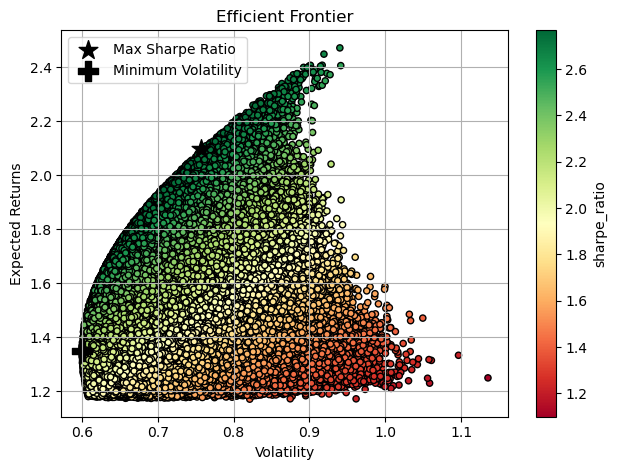

In [191]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.scatter(x=max_sharpe_portf.volatility, 
           y=max_sharpe_portf.returns, 
           c='black', marker='*', 
           s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility, 
           y=min_vol_portf.returns, 
           c='black', marker='P', 
           s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.legend()

plt.tight_layout()
plt.grid()
plt.show()

In [56]:
#Frontiera efficiente con la funzione di ottimizzazione di scipy
import scipy.optimize as sco
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

In [58]:
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):
    
    efficient_portfolios = []
    
    n_assets = len(avg_returns)
    args = (avg_returns, cov_mat)
    bounds = tuple((0,1) for asset in range(n_assets))
    initial_guess = n_assets * [1. / n_assets, ]
    
    for ret in rtns_range:
        constraints = ({'type': 'eq', 
                        'fun': lambda x: get_portf_rtn(x, avg_rtns) - ret},
                       {'type': 'eq', 
                        'fun': lambda x: np.sum(x) - 1})
        efficient_portfolio = sco.minimize(get_portf_vol, initial_guess, 
                                           args=args, method='SLSQP', 
                                           constraints=constraints,
                                           bounds=bounds)
        efficient_portfolios.append(efficient_portfolio)
    
    return efficient_portfolios

In [60]:
rtns_range = np.linspace(-0.22, 0.32, 200)

In [62]:
efficient_portfolios = get_efficient_frontier(avg_returns, 
                                              cov_mat, 
                                              rtns_range)

In [64]:
vols_range = [x['fun'] for x in efficient_portfolios]

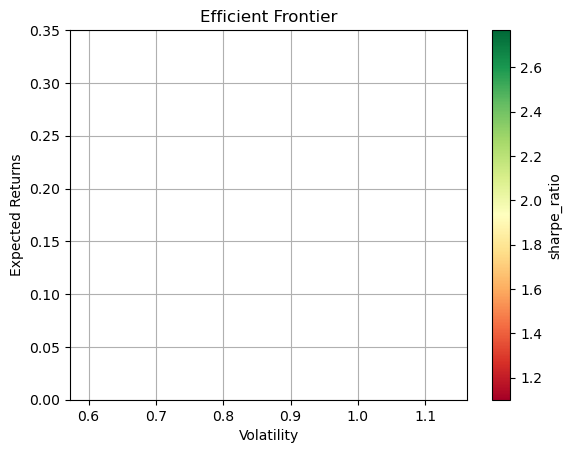

In [68]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
#ax.plot(vols_range, rtns_range, 'b--', linewidth=3)
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')

#plt.ylim(0.25,0.45)
plt.ylim(0,0.35)
plt.grid()
plt.show()

In [70]:
#Portafoglio con minima volatilità
min_vol_ind1 = np.argmin(vols_range)
min_vol_portf_rtn1 = rtns_range[min_vol_ind1]
min_vol_portf_vol1 = efficient_portfolios[min_vol_ind1]['fun']

min_vol_portf1 = {'Return': min_vol_portf_rtn1,
                 'Volatility': min_vol_portf_vol1,
                 'Sharpe Ratio': (min_vol_portf_rtn1 /
                                  min_vol_portf_vol1)}

min_vol_portf1

{'Return': 0.18703517587939703,
 'Volatility': 1.0241622016807586,
 'Sharpe Ratio': 0.18262261150865802}

In [218]:
#Sommario dei risultati
print('Minimum Volatility portfolio ----')
print('Performance')

for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(risky_assets, efficient_portfolios[min_vol_ind]['x']):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
Return: 31.19% Volatility: 102.42% Sharpe Ratio: 30.45% 
Weights
CVX: 0.00% GOOGL: 0.00% INTC: 0.00% JNJ: 0.00% PFE: 0.00% XOM: 100.00% 

In [72]:
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    portf_sharpe_ratio = (portf_returns - rf_rate) / portf_volatility
    return -portf_sharpe_ratio

In [74]:
n_assets = len(avg_returns)
RF_RATE = 0.04

args = (avg_returns, cov_mat, RF_RATE)
constraints = ({'type': 'eq', 
                'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets]

max_sharpe_portf = sco.minimize(neg_sharpe_ratio, 
                                x0=initial_guess, 
                                args=args,
                                method='SLSQP', 
                                bounds=bounds, 
                                constraints=constraints)

In [76]:
max_sharpe_portf_w = max_sharpe_portf['x']
max_sharpe_portf = {'Return': get_portf_rtn(max_sharpe_portf_w, 
                                            avg_returns),
                    'Volatility': get_portf_vol(max_sharpe_portf_w, 
                                                avg_returns, 
                                                cov_mat),
                    'Sharpe Ratio': -max_sharpe_portf['fun']}
max_sharpe_portf

{'Return': 2.0509557708697255,
 'Volatility': 0.7394265698258574,
 'Sharpe Ratio': 2.7196152436655425}

In [78]:
print('Maximum Sharpe Ratio portfolio ----')
print('Performance')

for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(risky_assets, max_sharpe_portf_w):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio ----
Performance
Return: 205.10% Volatility: 73.94% Sharpe Ratio: 271.96% 
Weights
CVX: 5.06% GOOGL: 57.92% INTC: 0.00% JNJ: 27.57% PFE: 9.46% XOM: 0.00% 

In [80]:
#Usiamo i rendimenti attesi 
d={'GOOGL':0.0818,'INTC':0.0781,'JNJ':0.0545,'PFE':0.0594,'XOM':0.0774,'CVX':0.0854}

In [82]:
means_exp = pd.Series(data=d, index=['GOOGL','INTC','JNJ','PFE','XOM','CVX'])
means_exp

GOOGL    0.0818
INTC     0.0781
JNJ      0.0545
PFE      0.0594
XOM      0.0774
CVX      0.0854
dtype: float64

In [94]:
portf_rtns2 = np.dot(weights, means_exp)

portf_vol2 = []
for i in range(0, len(weights)):
    portf_vol2.append(np.sqrt(np.dot(weights[i].T,
                                    np.dot(cov_mat, weights[i]))))
portf_vol2 = np.array(portf_vol)
portf_sharpe_ratio2 = portf_rtns2 / portf_vol2

In [96]:
portf_results_df2 = pd.DataFrame({'returns': portf_rtns2,
                                 'volatility': portf_vol2,
                                 'sharpe_ratio': portf_sharpe_ratio2})

In [98]:
n_points2 = 100
portf_vol_ef2 = []
indices_to_skip2 = []

portf_rtns_ef2 = np.linspace(portf_results_df2.returns.min(),
                            portf_results_df2.returns.max(),
                           n_points2)
portf_rtns_ef2 = np.round(portf_rtns_ef2, 2)
portf_rtns2 = np.round(portf_rtns2, 2)

for point_index in range(n_points2):
    if portf_rtns_ef2[point_index] not in portf_rtns2:
        indices_to_skip2.append(point_index)
        continue
    matched_ind = np.where(portf_rtns2 == portf_rtns_ef2[point_index])
    portf_vol_ef2.append(np.min(portf_vol2[matched_ind]))

portf_rtns_ef2 = np.delete(portf_rtns_ef2, indices_to_skip2)



/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/4135885173.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  ax.plot(portf_vol_ef2, portf_rtns_ef2, 'b--', color = 'red', linewidth = 2.5)
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/4135885173.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=means_exp[asset_index],


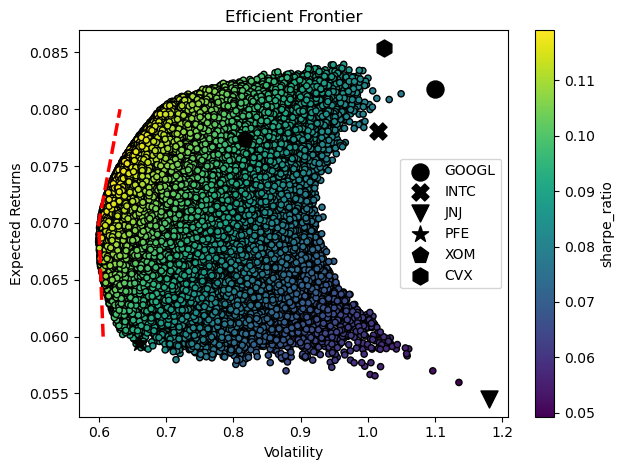

In [244]:
MARKS = ['o', 'X', 'v', '*', 'p', 'h']

fig, ax = plt.subplots()
portf_results_df2.plot(kind='scatter', x='volatility',
                      y='returns', c='sharpe_ratio',
                      cmap='viridis', edgecolors='black',
                      ax=ax)
ax.set(xlabel='Volatility',
       ylabel='Expected Returns',
       title='Efficient Frontier')
ax.plot(portf_vol_ef2, portf_rtns_ef2, 'b--', color = 'red', linewidth = 2.5)
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
                y=means_exp[asset_index],
                marker=MARKS[asset_index],
                s=150,
                color='black',
                label= tickers[asset_index])
ax.legend()

plt.tight_layout()
plt.show()


In [100]:

max_sharpe_ind2 = np.argmax(portf_results_df2.sharpe_ratio)
max_sharpe_portf2 = portf_results_df2.loc[max_sharpe_ind2]

min_vol_ind2 = np.argmin(portf_results_df2.volatility)
min_vol_portf2 = portf_results_df2.loc[min_vol_ind2]

In [102]:
print('Maximum Sharpe Ratio portfolio')
print('Performance')
for index, value in max_sharpe_portf2.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(tickers, weights[np.argmax(portf_results_df2.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)



Maximum Sharpe Ratio portfolio
Performance
returns: 7.43% volatility: 62.40% sharpe_ratio: 11.90% 
Weights
GOOGL: 0.94% INTC: 16.64% JNJ: 0.10% PFE: 28.17% XOM: 31.62% CVX: 22.53% 

In [104]:
print('Minimum Volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf2.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(tickers, weights[np.argmin(portf_results_df2.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
returns: 6.83% volatility: 59.95% sharpe_ratio: 11.40% 
Weights
GOOGL: 0.35% INTC: 11.49% JNJ: 0.31% PFE: 56.42% XOM: 17.96% CVX: 13.47% 

In [281]:
min_vol_portf2

returns         0.068347
volatility      0.599530
sharpe_ratio    0.114001
Name: 3296181, dtype: float64

/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_42900/1459262846.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  ax.plot(portf_vol_ef2, portf_rtns_ef2, 'b--', color='red', linewidth=2.5)
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_42900/1459262846.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


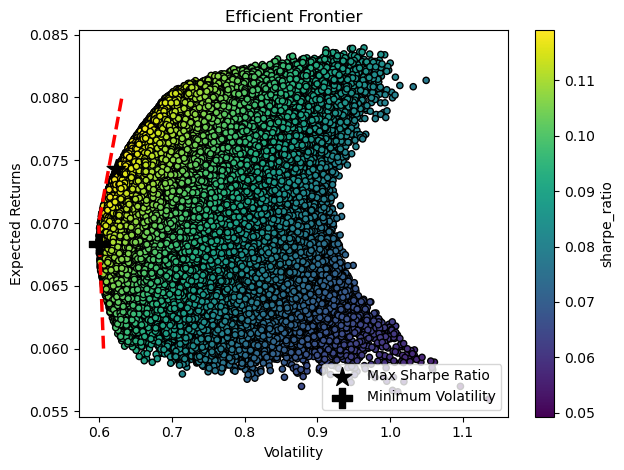

In [108]:
fig, ax = plt.subplots()

ax.plot(portf_vol_ef2, portf_rtns_ef2, 'b--', color='red', linewidth=2.5)

portf_results_df2.plot(kind='scatter', x='volatility',
                      y='returns', c='sharpe_ratio',
                      cmap='viridis', edgecolors='black',
                      ax=ax)

# Max Sharpe Ratio
ax.scatter(x=max_sharpe_portf2["volatility"],
           y=max_sharpe_portf2["returns"],
           c='black', marker='*', edgecolors='black',
           s=200, label='Max Sharpe Ratio', zorder=5)

# Minimum Volatility
ax.scatter(x=min_vol_portf2["volatility"],
           y=min_vol_portf2["returns"],
           c='black', marker='P', edgecolors='black',
           s=200, label='Minimum Volatility', zorder=5)

ax.set(xlabel='Volatility', ylabel='Expected Returns',
       title='Efficient Frontier')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:

efficient_portfolios2 = get_efficient_frontier(means_exp, cov_mat, rtns_range)
vols_range2 = [x['fun'] for x in efficient_portfolios2]

In [267]:
min_vol_ind3 = np.argmin(vols_range2)
min_vol_portf_rtn3 = rtns_range[min_vol_ind3]
min_vol_portf_vol3 = efficient_portfolios2[min_vol_ind3]['fun']

min_vol_portf3 = {'Return': min_vol_portf_rtn3,
                 'Volatility': min_vol_portf_vol3,
                 'Sharpe Ratio': (min_vol_portf_rtn3 /
                                  min_vol_portf_vol3)}



In [269]:
print('Minimum Volatility portfolio ----')
print('Performance')

for index, value in min_vol_portf3.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(tickers, efficient_portfolios2[min_vol_ind3]['x']):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)



Minimum Volatility portfolio ----
Performance
Return: 6.76% Volatility: 59.95% Sharpe Ratio: 11.28% 
Weights
GOOGL: 0.00% INTC: 10.49% JNJ: 1.81% PFE: 57.67% XOM: 18.03% CVX: 12.00% 

In [271]:
RF_RATE = 0

args2 = (means_exp, cov_mat, RF_RATE)
constraints2 = ({'type': 'eq',
                'fun': lambda x: np.sum(x) - 1})
bounds2 = tuple((0,1) for asset in range(n_assets))
initial_guess2 = n_assets * [1. / n_assets]

max_sharpe_portf2 = sco.minimize(neg_sharpe_ratio,
                                x0=initial_guess2,
                                args=args2,
                                method='SLSQP',
                                bounds=bounds2,
                                constraints=constraints2)

In [290]:
max_sharpe_portf_w2 = max_sharpe_portf2['x']
max_sharpe_portf2 = {'Return': get_portf_rtn(max_sharpe_portf_w2,
                                            means_exp),
                    'Volatility': get_portf_vol(max_sharpe_portf_w2,
                                                means_exp,
                                                cov_mat),
                    'Sharpe Ratio': -max_sharpe_portf2['fun']}
max_sharpe_portf2

{'Return': 0.07443277488871945,
 'Volatility': 0.6248198696737708,
 'Sharpe Ratio': 0.11912677317317404}

In [292]:
print('Maximum Sharpe Ratio portfolio ----')
print('Performance')

for index, value in max_sharpe_portf2.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(tickers, max_sharpe_portf_w2):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio ----
Performance
Return: 7.44% Volatility: 62.48% Sharpe Ratio: 11.91% 
Weights
GOOGL: 0.00% INTC: 16.33% JNJ: 0.00% PFE: 27.32% XOM: 33.41% CVX: 22.94% 

In [296]:
tickers2 = ['GOOGL','INTC','JNJ','PFE','XOM','CVX', '^GSPC', '^IRX']
data_capm = get(tickers2, start, end)
adj_close_capm = data_capm[['Adj Close']].reset_index()
daily_adjclose_capm = adj_close_capm.pivot(index = 'Date', columns = 'Ticker', values = 'Adj Close').pct_change().dropna()
daily_adjclose_capm = daily_adjclose_capm.rename(columns = {'^GSPC': 'MARKET', '^IRX': 'RF'})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/var/folders/xt/0wwfz20s32ndkjybf6tl4wd00000gn/T/ipykernel_1059/3087298398.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_adjclose_capm = adj_close_capm.pivot(index = 'Date', columns = 'Ticker', values = 'Adj Close').pct_change().dropn

In [298]:
#calcolo dei beta
daily_adjclose_capm_108 = daily_adjclose_capm[daily_adjclose_capm.index < end_108]
daily_adjclose_capm_108.tail()

Ticker           CVX     GOOGL      INTC       JNJ       PFE       XOM  \
Date                                                                     
2023-05-23  0.028929 -0.019912 -0.025429 -0.000382  0.022968  0.013623   
2023-05-24  0.002678 -0.013544 -0.017282 -0.000957 -0.025479  0.011184   
2023-05-25 -0.017231  0.021340 -0.055172 -0.014362 -0.020709 -0.017938   
2023-05-26 -0.003106  0.009151  0.058394 -0.000388 -0.006080 -0.006530   
2023-05-30 -0.006231 -0.007544  0.034138  0.000129 -0.015692 -0.008860   

Ticker        MARKET        RF  
Date                            
2023-05-23 -0.011222  0.011384  
2023-05-24 -0.007319  0.006210  
2023-05-25  0.008758 -0.004243  
2023-05-26  0.013049 -0.009297  
2023-05-30  0.000017  0.005474

In [310]:
market_returns = daily_adjclose_capm_108['MARKET']
min_vol_weights = weights[min_vol_ind]
min_vol_portf_returns_hist = ritorni_semplici_108[tickers].dot(min_vol_weights)
cov_matrix_min_vol = np.cov(min_vol_portf_returns_hist, market_returns)
market_var = market_returns.var()
min_vol_beta = cov_matrix_min_vol[0, 1] / market_var

for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print(f'Beta: {min_vol_beta:.3f}')

Return: 31.19% Volatility: 102.42% Sharpe Ratio: 30.45% Beta: 0.872


In [318]:
min_vol_weights1 = weights[min_vol_ind1]
min_vol_portf_returns_hist1 = ritorni_semplici_108[tickers].dot(min_vol_weights1)
cov_matrix_min_vol1 = np.cov(min_vol_portf_returns_hist1, market_returns)
min_vol_beta1 = cov_matrix_min_vol1[0, 1] / market_var

for index, value in min_vol_portf1.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print(f'Beta: {min_vol_beta1:.3f}')

Return: 31.19% Volatility: 102.42% Sharpe Ratio: 30.45% Beta: 0.872


In [320]:
min_vol_weights2 = weights[min_vol_ind2]
min_vol_portf_returns_hist2 = ritorni_semplici_108[tickers].dot(min_vol_weights2)
cov_matrix_min_vol2 = np.cov(min_vol_portf_returns_hist2, market_returns)
min_vol_beta2 = cov_matrix_min_vol2[0, 1] / market_var

for index, value in min_vol_portf2.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print(f'Beta: {min_vol_beta2:.3f}')

returns: 6.83% volatility: 59.95% sharpe_ratio: 11.40% Beta: 0.811


In [322]:
min_vol_weights3 = weights[min_vol_ind3]
min_vol_portf_returns_hist3 = ritorni_semplici_108[tickers].dot(min_vol_weights3)
cov_matrix_min_vol3 = np.cov(min_vol_portf_returns_hist3, market_returns)
min_vol_beta3 = cov_matrix_min_vol3[0, 1] / market_var

for index, value in min_vol_portf3.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print(f'Beta: {min_vol_beta3:.3f}')

Return: 6.76% Volatility: 59.95% Sharpe Ratio: 11.28% Beta: 0.938


In [324]:
#confronto portafoglio ottimale e effettivo
min_vol_portf

{'Return': 0.3118592964824122,
 'Volatility': 1.0241622872306295,
 'Sharpe Ratio': 0.3045018356667775}

In [351]:
equal_weights = np.array([1/n_assets] * n_assets)
equal_weighted_portf_returns = np.dot(equal_weights, avg_returns)

print('Portafoglio a minima varianza metodo simulativo')
print(f'Annualized Return: {min_vol_portf["Return"] * 100:.2f}%')
print(f'Volatility: {min_vol_portf["Volatility"] * 100:.2f}%')
print(f'Sharpe Ratio: {min_vol_portf["Sharpe Ratio"] * 100:.2f}')
print(f'Beta: {min_vol_beta:.2f}')

print('\nEqual Weighted Portfolio')
print(f'Annualized Return: {equal_weighted_portf_returns * 100:.2f}%')

# Calcolo della volatilità del portafoglio equiponderato
equal_weighted_portf_vol = np.sqrt(np.dot(equal_weights.T, np.dot(cov_mat, equal_weights)))
print(f'Volatility: {equal_weighted_portf_vol * 100:.2f}%')

# Calcolo del rapporto di Sharpe del portafoglio equiponderato
equal_weighted_sharpe_ratio = equal_weighted_portf_returns / equal_weighted_portf_vol
print(f'Sharpe Ratio: {equal_weighted_sharpe_ratio:.2f}')

# Calcolo del beta del portafoglio equiponderato
equal_weighted_portf_returns_hist = ritorni_semplici_108[tickers].dot(equal_weights)
cov_matrix_equal_weighted = np.cov(equal_weighted_portf_returns_hist, market_returns)
equal_weighted_beta = cov_matrix_equal_weighted[0, 1] / market_returns.var()
print(f'Beta: {equal_weighted_beta:.2f}')


Portafoglio a minima varianza metodo simulativo
Annualized Return: 31.19%
Volatility: 102.42%
Sharpe Ratio: 30.45
Beta: 0.87

Equal Weighted Portfolio
Annualized Return: 148.24%
Volatility: 69.26%
Sharpe Ratio: 2.14
Beta: 0.92


In [353]:
print('Portafoglio a minima varianza metodo analitico')
print(f'Annualized Return: {min_vol_portf1["Return"] * 100:.2f}%')
print(f'Volatility: {min_vol_portf1["Volatility"] * 100:.2f}%')
print(f'Sharpe Ratio: {min_vol_portf1["Sharpe Ratio"] * 100:.2f}')
print(f'Beta: {min_vol_beta1:.2f}')

print('\nEqual Weighted Portfolio')
print(f'Annualized Return: {equal_weighted_portf_returns * 100:.2f}%')
print(f'Volatility: {equal_weighted_portf_vol * 100:.2f}%')
print(f'Sharpe Ratio: {equal_weighted_sharpe_ratio:.2f}')
print(f'Beta: {equal_weighted_beta:.2f}')

Portafoglio a minima varianza metodo analitico
Annualized Return: 31.19%
Volatility: 102.42%
Sharpe Ratio: 30.45
Beta: 0.87

Equal Weighted Portfolio
Annualized Return: 148.24%
Volatility: 69.26%
Sharpe Ratio: 2.14
Beta: 0.92


In [355]:
print('Portafoglio a minima varianza metodo simulativo con rendimenti calcolati con CAPM')
print(f'Annualized Return: {min_vol_portf2["returns"] * 100:.2f}%')
print(f'Volatility: {min_vol_portf2["volatility"] * 100:.2f}%')
print(f'Sharpe Ratio: {min_vol_portf2["sharpe_ratio"] * 100:.2f}')
print(f'Beta: {min_vol_beta2:.2f}')

print('\nEqual Weighted Portfolio')
print(f'Annualized Return: {equal_weighted_portf_returns * 100:.2f}%')
print(f'Volatility: {equal_weighted_portf_vol * 100:.2f}%')
print(f'Sharpe Ratio: {equal_weighted_sharpe_ratio:.2f}')
print(f'Beta: {equal_weighted_beta:.2f}')

Portafoglio a minima varianza metodo simulativo con rendimenti calcolati con CAPM
Annualized Return: 6.83%
Volatility: 59.95%
Sharpe Ratio: 11.40
Beta: 0.81

Equal Weighted Portfolio
Annualized Return: 148.24%
Volatility: 69.26%
Sharpe Ratio: 2.14
Beta: 0.92


In [357]:
print('Portafoglio a minima varianza metodo analitico con rendimenti calcolati con CAPM')
print(f'Annualized Return: {min_vol_portf3["Return"] * 100:.2f}%')
print(f'Volatility: {min_vol_portf3["Volatility"] * 100:.2f}%')
print(f'Sharpe Ratio: {min_vol_portf3["Sharpe Ratio"] * 100:.2f}')
print(f'Beta: {min_vol_beta3:.2f}')

print('\nEqual Weighted Portfolio')
print(f'Annualized Return: {equal_weighted_portf_returns * 100:.2f}%')
print(f'Volatility: {equal_weighted_portf_vol * 100:.2f}%')
print(f'Sharpe Ratio: {equal_weighted_sharpe_ratio:.2f}')
print(f'Beta: {equal_weighted_beta:.2f}')

Portafoglio a minima varianza metodo analitico con rendimenti calcolati con CAPM
Annualized Return: 6.76%
Volatility: 59.95%
Sharpe Ratio: 11.28
Beta: 0.94

Equal Weighted Portfolio
Annualized Return: 148.24%
Volatility: 69.26%
Sharpe Ratio: 2.14
Beta: 0.92
